<a href="https://colab.research.google.com/github/ritikbavdekar/windSpeedForecasting/blob/main/Wind_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5 MB 4.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')

In [ ]:
data_useful=data.drop(["Year","Month","Day","Hour"],axis=1)

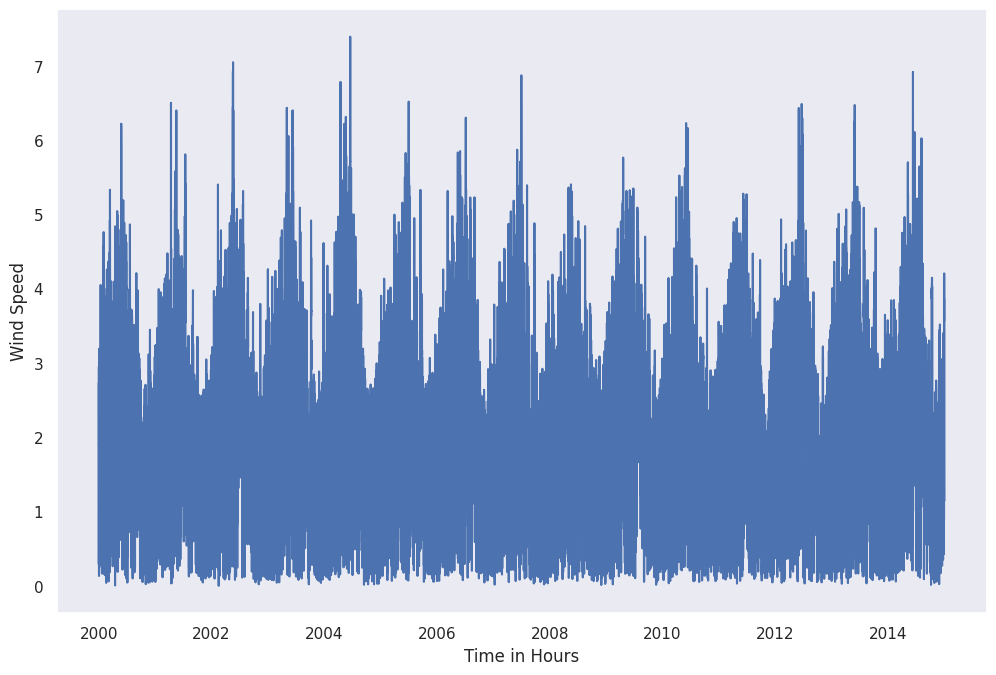

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(data["Wind Speed"])
plt.ylabel('Wind Speed')
plt.xlabel('Time in Hours')
plt.grid(False)
plt.show()

In [ ]:
data["Wind Speed"].describe()

count    131496.000000
mean          2.072082
std           1.024764
min           0.002848
25%           1.308593
50%           1.971358
75%           2.716452
max           7.391081
Name: Wind Speed, dtype: float64

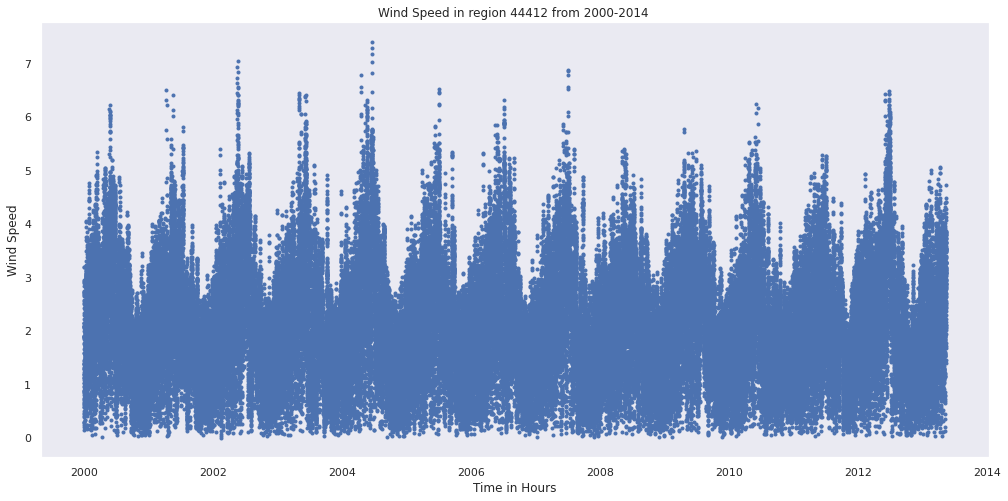

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(data["Wind Speed"],marker='.',linestyle='None')
plt.title('Wind Speed in region 44412 from 2000-2014 ')
plt.ylabel('Wind Speed')
plt.xlabel('Time in Hours')
plt.grid(False)
plt.show()

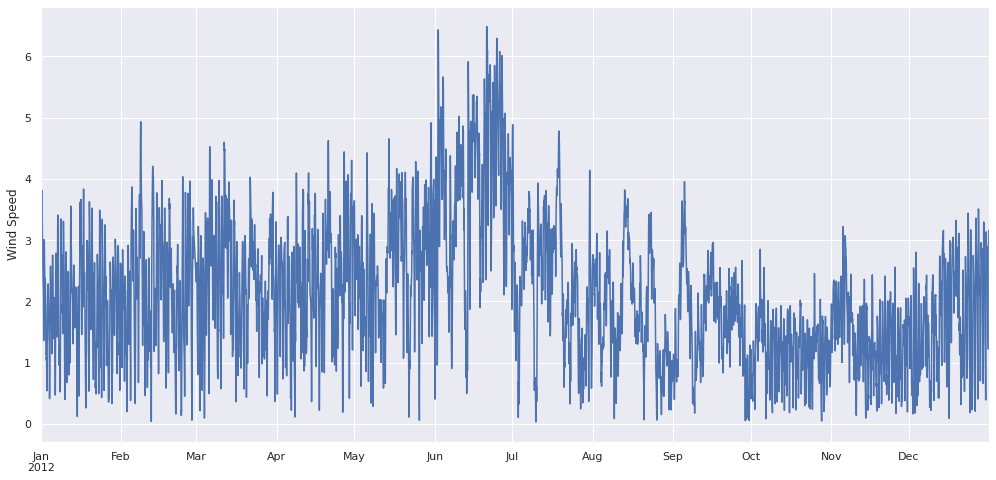

In [ ]:
#2012 plot
plt.figure(figsize=(17, 8))
ax = data.loc['2012', 'Wind Speed'].plot()
ax.set_ylabel('Wind Speed');

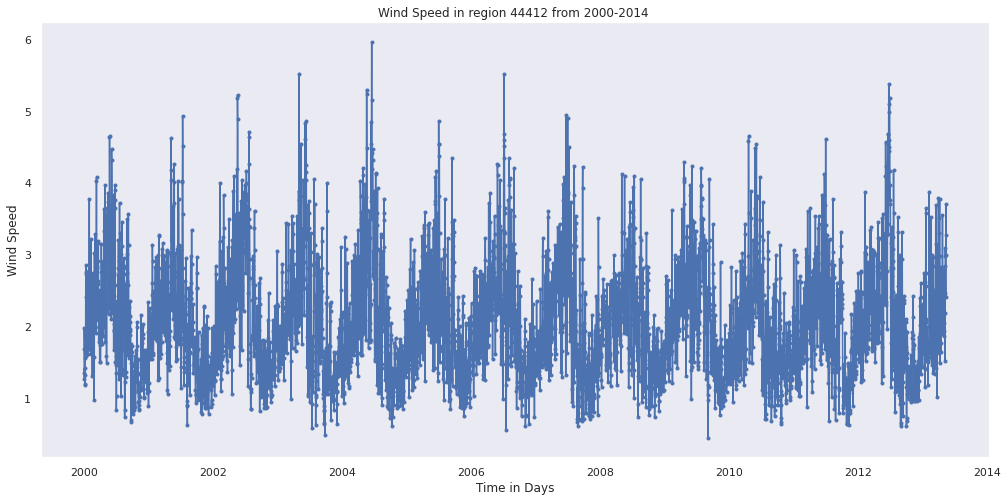

In [ ]:
data_columns = ['Wind Speed']
# Resample to daily frequency, aggregating with mean
data_daily_mean = data[data_columns].resample('D').mean()
plt.figure(figsize=(17, 8))
plt.plot(data_daily_mean["Wind Speed"],marker='.')
plt.title('Wind Speed in region 44412 from 2000-2014 ')
plt.ylabel('Wind Speed')
plt.xlabel('Time in Days')
plt.grid(False)
plt.show()

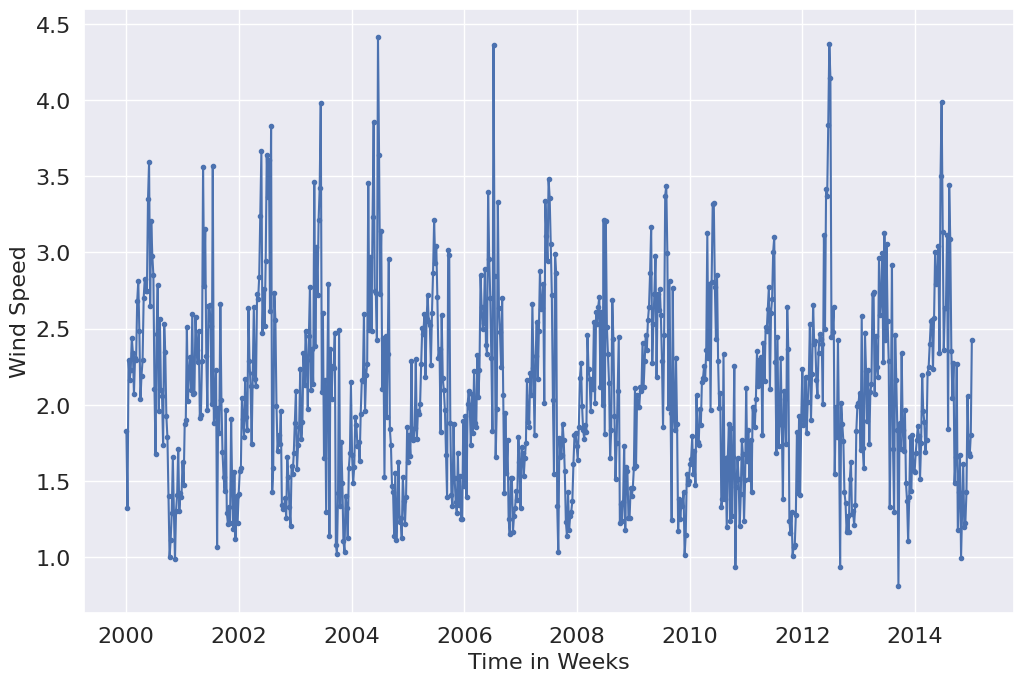

In [ ]:
data_columns = ['Wind Speed']
# Resample to weekly frequency, aggregating with mean
data_weekly_mean = data[data_columns].resample('W').mean()
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(data_weekly_mean["Wind Speed"],marker='.')
# plt.title('Wind Speed in region 44412 from 2000-2014 ')
plt.ylabel('Wind Speed',fontsize="16")
plt.xlabel('Time in Weeks',fontsize="16")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

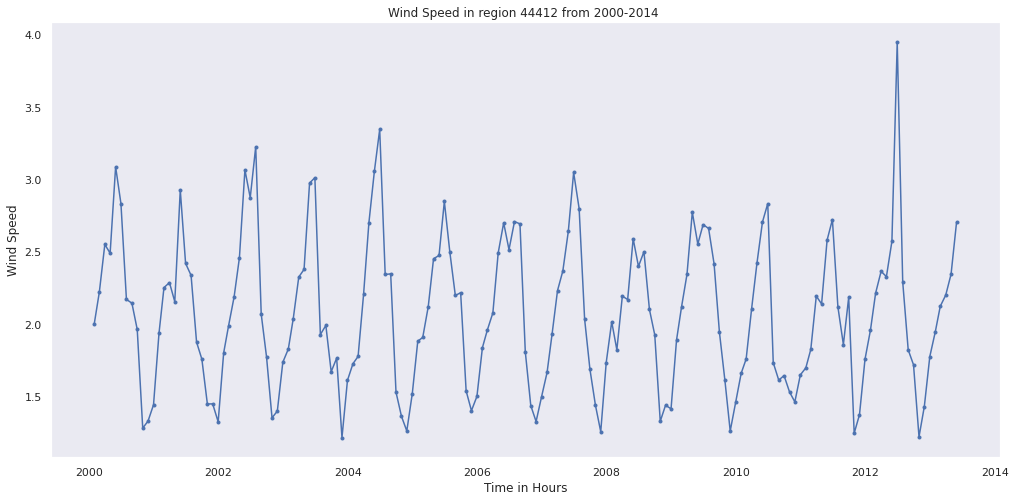

In [ ]:
data_columns = ['Wind Speed']
# Resample to monthly frequency, aggregating with mean
data_monthly_mean = data[data_columns].resample('M').mean()
plt.figure(figsize=(17, 8))
plt.plot(data_monthly_mean["Wind Speed"],marker='.')
plt.title('Wind Speed in region 44412 from 2000-2014 ')
plt.ylabel('Wind Speed')
plt.xlabel('Time in Hours')
plt.grid(False)
plt.show()

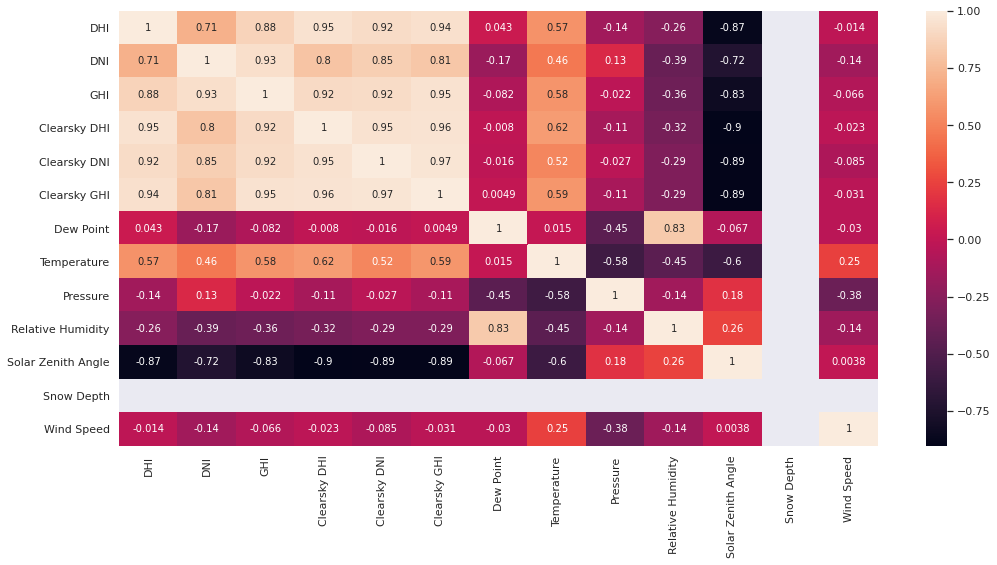

In [ ]:
plt.figure(figsize=(17, 8))
corrMatrix = data_useful.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

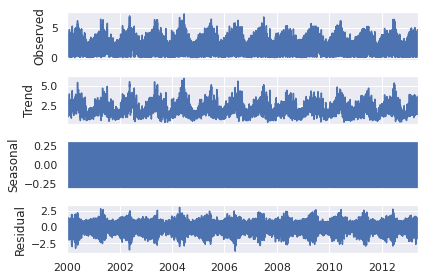

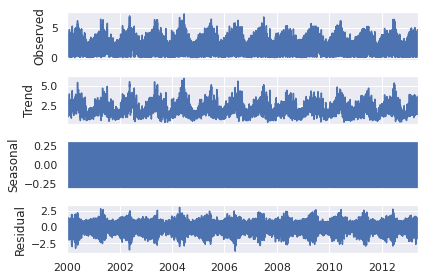

In [ ]:
#Hourly Additive
from statsmodels.tsa.seasonal import seasonal_decompose
series = data['Wind Speed']
result = seasonal_decompose(series.asfreq('H'), model='additive')
result.plot()

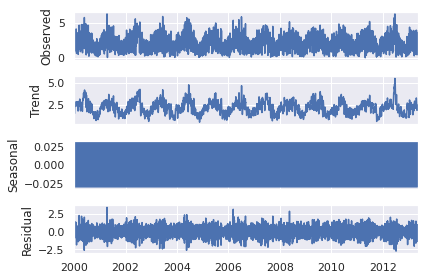

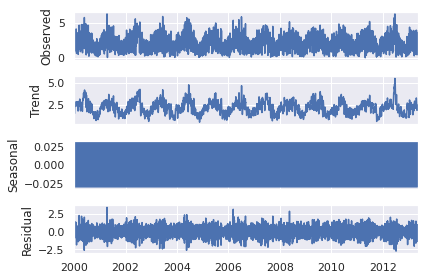

In [ ]:
#Daily Additive
series = data['Wind Speed']
result = seasonal_decompose(series.asfreq('d'), model='additive')
result.plot()

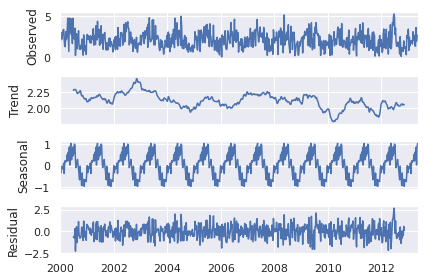

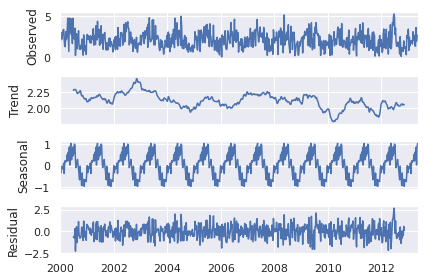

In [ ]:
#weekly additive plots
series = data['Wind Speed']
result = seasonal_decompose(series.asfreq('W'), model='additive')
result.plot()

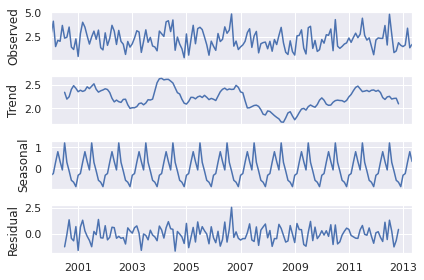

<Figure size 1224x576 with 0 Axes>

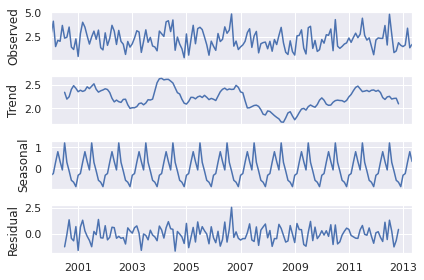

In [ ]:
#monthly sampled data Additive
series = data['Wind Speed']
result = seasonal_decompose(series.asfreq('MS'), model='additive')
plt.figure(figsize=(17, 8))
result.plot()

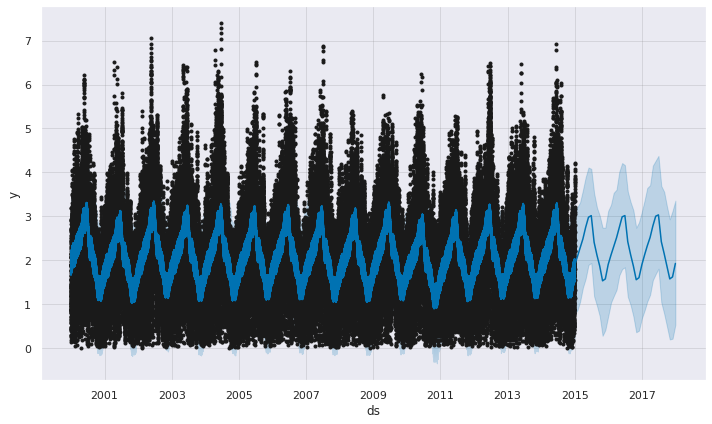

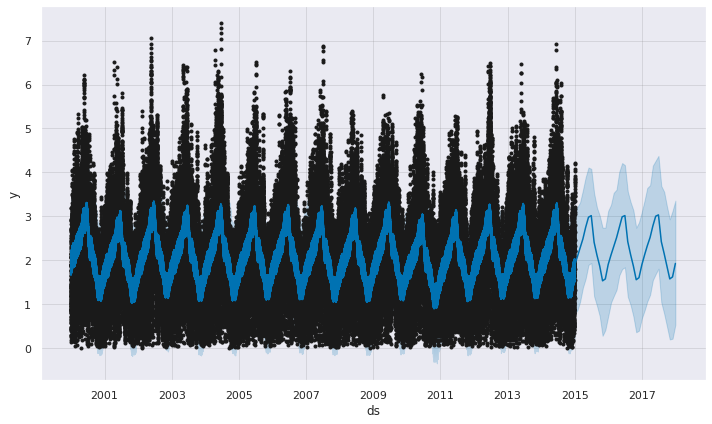

In [ ]:
#prophet Predictions Univariate (FB)

from fbprophet import Prophet
t_prophet = pd.DataFrame()
t_prophet['ds'] = data.index
t_prophet['y'] = data['Wind Speed'].values
m = Prophet()
m.fit(t_prophet)

future = m.make_future_dataframe(freq='m', periods=3*12)
forecast = m.predict(future)

m.plot(forecast)

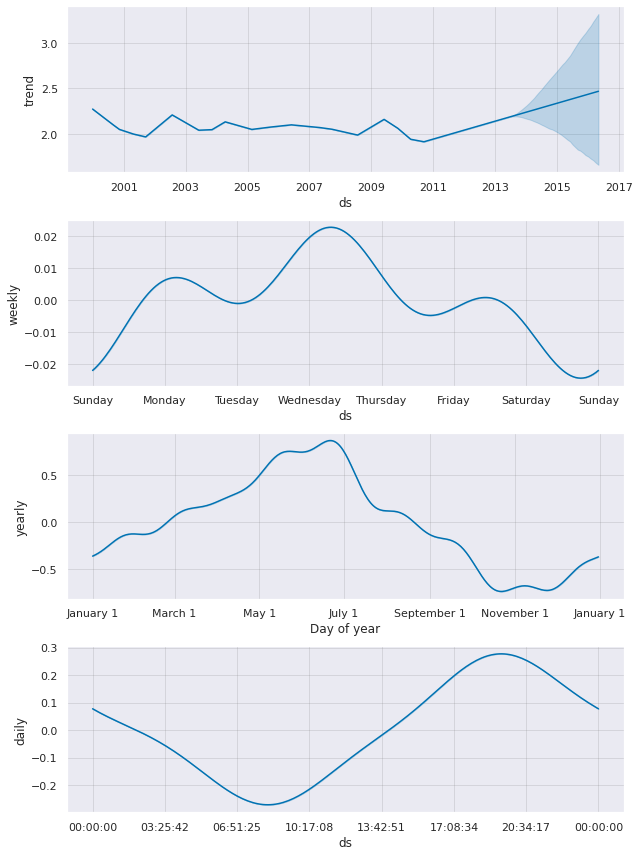

In [ ]:
m.plot_components(forecast);

In [ ]:
#Hourly Forecast
data=data['Wind Speed'].resample('H').mean()
# data.head()
start = datetime.datetime(2000, 1, 1,0,0)
end = datetime.datetime(2013, 12, 31,23,59)
endi=datetime.datetime(2014, 1, 6,0,0)
index = pd.date_range(start, end)
train=data[start:end]
test=data[endi:]

In [ ]:
from fbprophet import Prophet
t_prophet = pd.DataFrame()
t_prophet['ds'] = train.index
t_prophet['y'] = train.values
m = Prophet()
m.fit(t_prophet)

future = m.make_future_dataframe(freq='H', periods=24)
forecast = m.predict(future)

# m.plot(forecast)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
future=m.make_future_dataframe(freq='H', periods=24*5)
forecast=m.predict(future)

In [ ]:
future=forecast[122760-24:]
print(future)

                        ds     trend  ...  multiplicative_terms_upper      yhat
122736 2014-01-01 00:00:00  2.122528  ...                         0.0  1.851550
122737 2014-01-01 01:00:00  2.122532  ...                         0.0  1.813467
122738 2014-01-01 02:00:00  2.122537  ...                         0.0  1.779407
122739 2014-01-01 03:00:00  2.122542  ...                         0.0  1.741822
122740 2014-01-01 04:00:00  2.122547  ...                         0.0  1.695501
...                    ...       ...  ...                         ...       ...
122851 2014-01-05 19:00:00  2.123089  ...                         0.0  2.075803
122852 2014-01-05 20:00:00  2.123094  ...                         0.0  2.072509
122853 2014-01-05 21:00:00  2.123099  ...                         0.0  2.038171
122854 2014-01-05 22:00:00  2.123104  ...                         0.0  1.985770
122855 2014-01-05 23:00:00  2.123108  ...                         0.0  1.930629

[120 rows x 22 columns]


In [ ]:
yhat_prophet=future[["yhat","ds"]]

In [ ]:
# yhat_prophet=yhat_prophet.set_index("ds")
print(yhat_prophet)

ds
2014-01-01 00:00:00    1.851550
2014-01-01 01:00:00    1.813467
2014-01-01 02:00:00    1.779407
2014-01-01 03:00:00    1.741822
2014-01-01 04:00:00    1.695501
                         ...   
2014-01-05 19:00:00    2.075803
2014-01-05 20:00:00    2.072509
2014-01-05 21:00:00    2.038171
2014-01-05 22:00:00    1.985770
2014-01-05 23:00:00    1.930629
Name: yhat, Length: 120, dtype: float64


In [ ]:

yhat_prophet=yhat_prophet["yhat"]

In [ ]:
print(yhat_prophet)

122736    1.851550
122737    1.813467
122738    1.779407
122739    1.741822
122740    1.695501
            ...   
122851    2.075803
122852    2.072509
122853    2.038171
122854    1.985770
122855    1.930629
Name: yhat, Length: 120, dtype: float64


0.7745567792280211


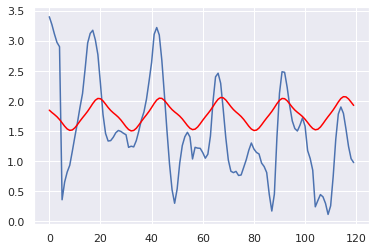

In [ ]:
future=forecast[122760-24:]
future=future.reset_index()
endi=datetime.datetime(2014, 1, 1,0,0)
endl=datetime.datetime(2014, 1, 5,23,23)
test=data[endi:endl]
test=test.reset_index()['Wind Speed']
plt.plot(test)
plt.plot(future['yhat'], color='red')
se = np.square(future.loc[:, 'yhat'] - test)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)


In [ ]:
print(test)

0      3.405123
1      3.277353
2      3.118816
3      2.978615
4      2.906633
         ...   
115    1.798239
116    1.536560
117    1.247846
118    1.044186
119    0.979765
Name: Wind Speed, Length: 120, dtype: float64


In [ ]:
#Daily Forecast
data=data[:].resample('D').mean()
# data.head()
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2013, 12, 31,)
endi=datetime.datetime(2014, 1, 1)
endl=datetime.datetime(2014, 1, 31)
index = pd.date_range(start, end)
train=data[start:end]
test=data[endi:endl]

In [ ]:
from fbprophet import Prophet
t_prophet = pd.DataFrame()
t_prophet['ds'] = train.index
t_prophet['y'] = train.values
m = Prophet(daily_seasonality=True)
m.fit(t_prophet)

future = m.make_future_dataframe(freq='D', periods=31)
forecast = m.predict(future)

m.plot(forecast)

ValueError: ignored

0.4233357835935729


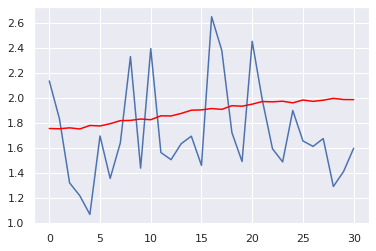

In [ ]:
future=forecast[5144-30:]
future=future.reset_index()
test=test.reset_index()['Wind Speed']
plt.plot(test)
plt.plot(future['yhat'], color='red')
se = np.square(future.loc[:, 'yhat'] - test)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)


In [ ]:
#monthly predictions
data=data[:].resample('M').mean()
# data.head()
start = datetime.datetime(2000, 1,1)
end = datetime.datetime(2013, 12,31)
endi=datetime.datetime(2014, 1,1)
endl=datetime.datetime(2015, 1,1)
index = pd.date_range(start, end)
train=data[start:end]
test=data[endi:endl]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


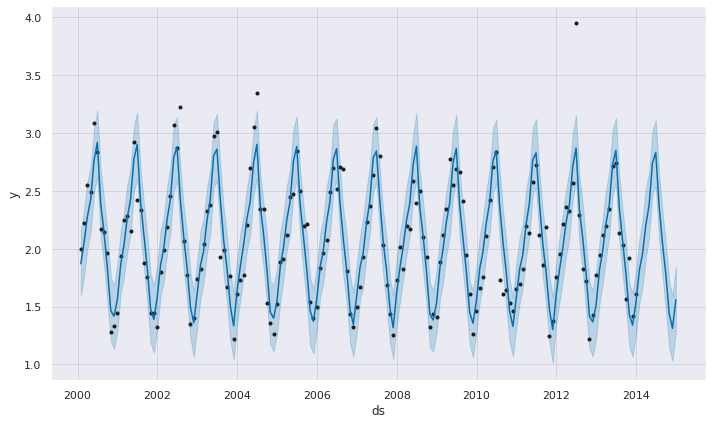

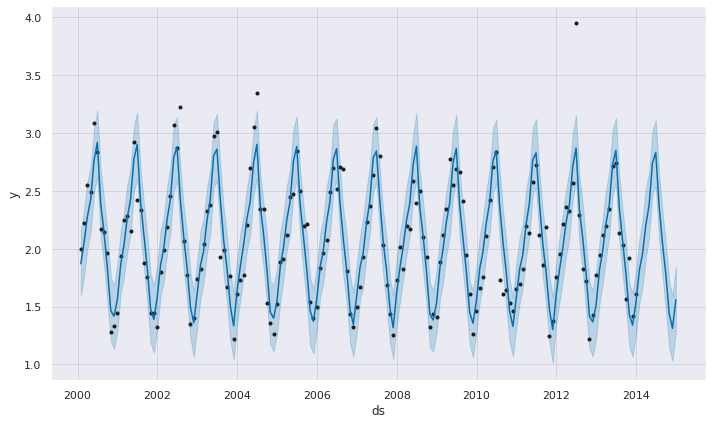

In [ ]:
t_prophet = pd.DataFrame()
t_prophet['ds'] = train.index
t_prophet['y'] = train.values
m = Prophet(yearly_seasonality=True)
m.fit(t_prophet)

future = m.make_future_dataframe(freq='M', periods=12)
forecast = m.predict(future)

m.plot(forecast)

In [ ]:
future=forecast[168:]
future=future.set_index("ds")
yhat_prophet=future["yhat"]

In [ ]:
print(yhat_arima24)

ds
2014-01-01 00:00:00    2.147278
2014-01-01 01:00:00    2.127812
2014-01-01 02:00:00    2.053986
2014-01-01 03:00:00    1.986163
2014-01-01 04:00:00    1.975568
                         ...   
2014-01-05 19:00:00    2.162788
2014-01-05 20:00:00    2.070982
2014-01-05 21:00:00    1.939327
2014-01-05 22:00:00    1.810284
2014-01-05 23:00:00    1.696697
Length: 120, dtype: float64


0.2759151421041544


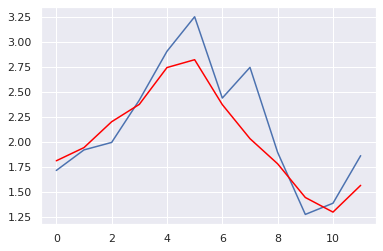

In [ ]:
future=forecast[168:]
future=future.reset_index()
test=test.reset_index()['Wind Speed']
plt.plot(test)
plt.plot(future['yhat'], color='red')
se = np.square(future.loc[:, 'yhat'] - test)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

In [ ]:
#AR Model Best lag grid search

from statsmodels.tsa.ar_model import AutoReg
# fit model
e_min=1
e_arg=0
for i in range(1,61):
  model = AutoReg(train, lags=i)
  model_fit = model.fit()
  yhat = model_fit.predict(len(train), len(train)+364)
  yhat=yhat.reset_index()
  e=rmse(yhat,test)
  if(e_min>e):
    e_min=e
    e_arg=i
print(e_min)
print(e_arg)



0.8554052740023077
18


In [ ]:
def rmse(yhat,test):
  se = np.square(yhat.loc[:, 0].values - test['Wind Speed'].values)
  mse = np.mean(se)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')
data=data['Wind Speed'].resample('H').mean()

In [ ]:
#Hourly Forecast

# data.head()
start = datetime.datetime(2000, 1, 1,0,0)
end = datetime.datetime(2013, 12, 31,23,59)
endi=datetime.datetime(2014, 1, 1,0,0)
endl=datetime.datetime(2014, 1, 5,23,23)
index = pd.date_range(start, end)
train=data[start:end]
test=data[endi:endl]
# test=test.reset_index()

In [ ]:
start=datetime.datetime(2013, 12, 27,0,0)
yhat_data=data[start:endl]

In [ ]:
print(yhat_data)

2013-12-27 00:00:00    1.668659
2013-12-27 01:00:00    1.631388
2013-12-27 02:00:00    1.517294
2013-12-27 03:00:00    1.399512
2013-12-27 04:00:00    1.364468
                         ...   
2014-01-05 19:00:00    1.798239
2014-01-05 20:00:00    1.536560
2014-01-05 21:00:00    1.247846
2014-01-05 22:00:00    1.044186
2014-01-05 23:00:00    0.979765
Freq: H, Name: Wind Speed, Length: 240, dtype: float64


In [ ]:
#AR works best for lag=18 Searching for best lag
from statsmodels.tsa.ar_model import AutoReg

error_least=2.0
lag_best=1
for i in range(1,60):
  model = AutoReg(train, lags=i)
  model_fit = model.fit()
  yhat = model_fit.predict(len(train), len(train)+23)
  yhat=yhat.reset_index()
  e=rmse(yhat,test)
  if(e<error_least):
    error_least=e
    lag_best=i
    print(lag_best)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags=2)
model_fit = model.fit()
# trainplt=train[len(train)-24*20:len(train)-24*10]
# yhat = model_fit.predict(len(train)-24*10, len(train))
forecast=model_fit.predict(len(train), len(train)+24*5-1)
# forecast=forecast.reset_index()
# e=rmse(forecast,test)
# print(e)


In [ ]:
se = np.square(forecast.values - test.values)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

0.9793715353120744


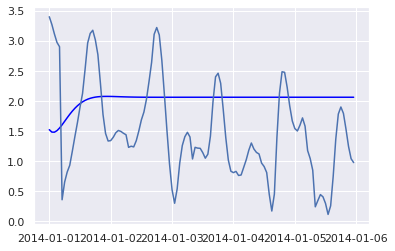

In [ ]:

plt.plot(forecast,color='blue')
plt.plot(test)

In [ ]:
def rmse(yhat,test):
  se = np.square(yhat['predicted_mean'].values - test['Wind Speed'].values)
  mse = np.mean(se)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
#Hourly Forecast
#MA Model
from statsmodels.tsa.arima.model import ARIMA
# contrived dataset
# fit model
model = ARIMA(train, order=(0, 0, 2))
model_fit = model.fit()
# make prediction
# trainplt=train[len(train)-24*20:len(train)-24*10]
# yhat = model_fit.predict(len(train)-24*10, len(train))
forecast=model_fit.predict(len(train), len(train)+24*5-1)
# yhat=yhat.reset_index()
# print(rmse(yhat,test))


In [ ]:
se = np.square(forecast.values - test.values)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

0.9708522640270681


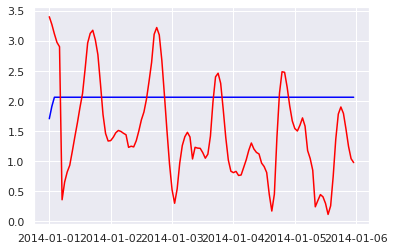

In [ ]:

plt.plot(forecast,color='blue')
plt.plot(test, color='red')

In [ ]:
#ARMA
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()
# make prediction
forecast = model_fit.predict(len(train), len(train)+24*5-1)
# yhat=yhat.reset_index()
# print(rmse(yhat,test))
# trainplt=train[len(train)-24*20:len(train)-24*10]
# yhat = model_fit.predict(len(train)-24*10, len(train))
# forecast=model_fit.predict(len(train), len(train)+24)

In [ ]:
se = np.square(forecast.values - test.values)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

0.9008629969293012


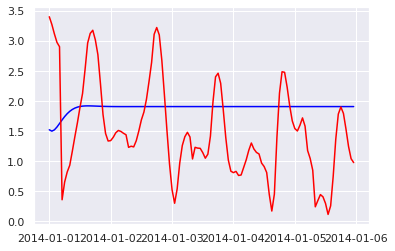

In [ ]:

plt.plot(forecast,color='blue')
plt.plot(test, color='red')
# plt.plot(trainplt, color='black')
# plt.legend(('Forecasting','Fitting','Data',))

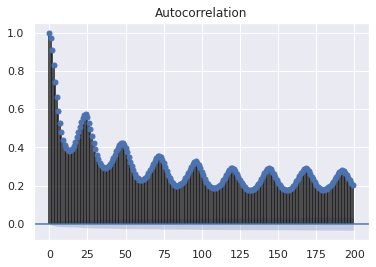

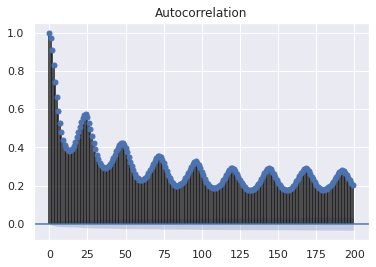

In [ ]:
#ARIMA ACF
from statsmodels.graphics.tsaplots import plot_acf
# series = data['Wind Speed']
plot_acf(data,lags=np.arange(200))

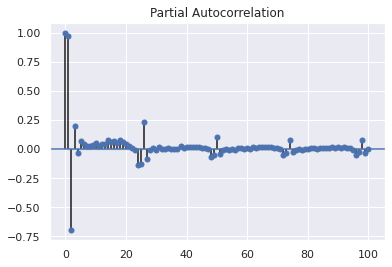

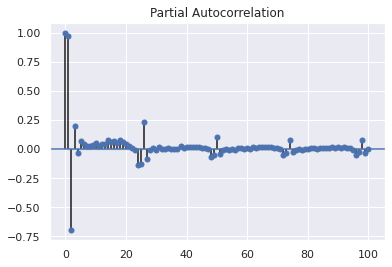

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=100)

In [ ]:

# # ARIMA best model grid search
# from statsmodels.tsa.arima.model import ARIMA
# e_min=1
# a_arg=0
# b_arg=0
# c_arg=0
# for a in range(1,4):
#   for b in range(1,4):
#     for c in range(1,4):
#       model = ARIMA(train, order=(a, b, c))
#       model_fit = model.fit()
#       yhat = model_fit.predict(len(train), len(train)+364)
#       yhat=yhat.reset_index()
#       e=error(yhat,test)
#       if(e<e_min):
#         a_arg=a
#         b_arg=b
#         c_arg=c
#         e_min=e
#         print(e_min)
#         print(a_arg)
#         print(b_arg)
#         print(c_arg)
# print(e_min)
# print(a_arg)
# print(b_arg)
# print(c_arg)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2,3 , 5))
model_fit = model.fit()
yhat = model_fit.predict(len(train), len(train)+23)
yhat=yhat.reset_index()
e=rmse(yhat,test)
print(e)

1.7531092501531889


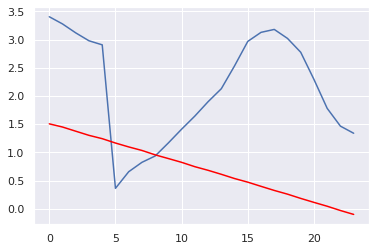

In [ ]:
plt.plot(test['Wind Speed'])
plt.plot(yhat['predicted_mean'], color='red')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
a_best=-1
b_best=-1
c_best=-1
d_best=-1
e_best=1
for a in range(1,4):
  for b in range(1,4):
    for c in range(1,4):
      for d in range(2,4):
        model = SARIMAX(train, order=(2, 2, 3),seasonal_order=(a,b,c,d))
        model_fit = model.fit(disp=False)
        yhat = model_fit.predict(len(train), len(train)+364)
        yhat=yhat.reset_index()
        e=error(yhat,test)
        if(e<e_best):
          e_best=e
          a_best=a
          b_best=b
          c_best=c
          d_best=d
          print(e_best)
          print(a_best)
          print(b_best)
          print(c_best)
          print(d_best)





In [ ]:
#https://online.stat.psu.edu/stat510/lesson/4/4.1#:~:text=In%20a%20seasonal%20ARIMA%20model,the%20span%20of%20the%20seasonality).&text=A%20seasonal%20second%20order%20autoregressive,x%20t%20%E2%88%92%2024%20to%20predict%20.
#SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(2,2,3),seasonal_order=(1,0,1,24))
model_fit = model.fit()
yhat = model_fit.predict(len(train), len(train)+23)
yhat=yhat.reset_index()
e=rmse(yhat,test)
print(e)

In [ ]:
plt.plot(test)
plt.plot(yhat['predicted_mean'], color='red')

In [ ]:
def rmse(yhat,test):
  se = np.square(yhat.loc[:, 0].values - test['Wind Speed'].values)
  mse = np.mean(se)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
#SIMPLE EXPONENTIAL SMOOTHENING
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# fit model
model = SimpleExpSmoothing(train)
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(train), len(train)+23)
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)
# trainplt=train[len(train)-24*20:len(train)-24*10]
# yhat = model_fit.predict(len(train)-24*10, len(train))
forecast=model_fit.predict(len(train), len(train)+24*5-1)

In [ ]:
se = np.square(forecast.values - test.values)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

0.7969013290322143


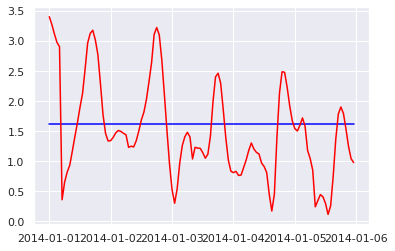

In [ ]:

plt.plot(forecast,color='blue')
plt.plot(test, color='red')
# plt.plot(trainplt, color='black')
# plt.legend(('Forecasting','Fitting','Data',))

In [ ]:
#Holt Winters Exponential Smoothening
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=24)
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(train), len(train)+23)
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)
# trainplt=train[len(train)-24*20:len(train)-24*10]
# yhat = model_fit.predict(len(train)-24*10, len(train))
forecast=model_fit.predict(len(train), len(train)+24*5-1)

In [ ]:
se = np.square(forecast.values - test.values)
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

0.722791265507991


In [ ]:
yhat_holt=forecast

In [ ]:
print(yhat_holt)

2014-01-01 00:00:00    1.575210
2014-01-01 01:00:00    1.541561
2014-01-01 02:00:00    1.491986
2014-01-01 03:00:00    1.445543
2014-01-01 04:00:00    1.411232
                         ...   
2014-01-05 19:00:00    1.774078
2014-01-05 20:00:00    1.761259
2014-01-05 21:00:00    1.721895
2014-01-05 22:00:00    1.670420
2014-01-05 23:00:00    1.618089
Freq: H, Length: 120, dtype: float64


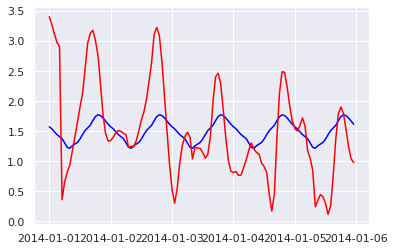

In [ ]:

plt.plot(forecast,color='blue')
plt.plot(test, color='red')
# plt.plot(trainplt, color='black')
# plt.legend(('Forecasting','Fitting','Data',))

In [ ]:
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')

In [ ]:
#Daily Forecast
data=data['Wind Speed'].resample('D').mean()
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2013, 12, 31)
endi=datetime.datetime(2014, 1, 1)
endl=datetime.datetime(2014, 1, 31)
index = pd.date_range(start, end)
train=data[start:end]
test=data[endi:endl]
test=test.reset_index()

In [ ]:
def rmse(yhat,test):
  se = np.square(yhat.loc[:, 0].values - test['Wind Speed'].values)
  mse = np.mean(se)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
#best at 49
from statsmodels.tsa.ar_model import AutoReg
best_lag=1
e_min=1.0
for lag in range(1,200):
  model = AutoReg(train, lags=lag)
  model_fit = model.fit()
  yhat = model_fit.predict(len(train), len(train)+30)
  yhat=yhat.reset_index()
  e=rmse(yhat,test)
  if(e<e_min):
    e_min=e
    best_lag=lag
    print(e_min)
    print(best_lag)



ImportError: ignored

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags=49)
model_fit = model.fit()
trainplt=train[len(train)-30*4:]
yhat_ar = model_fit.predict(len(train)-30*2, len(train))
forecast=model_fit.predict(len(train), len(train)+30)
# yhat = model_fit.predict(len(train), len(train)+30)
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)

In [ ]:
from matplotlib.pyplot import figure

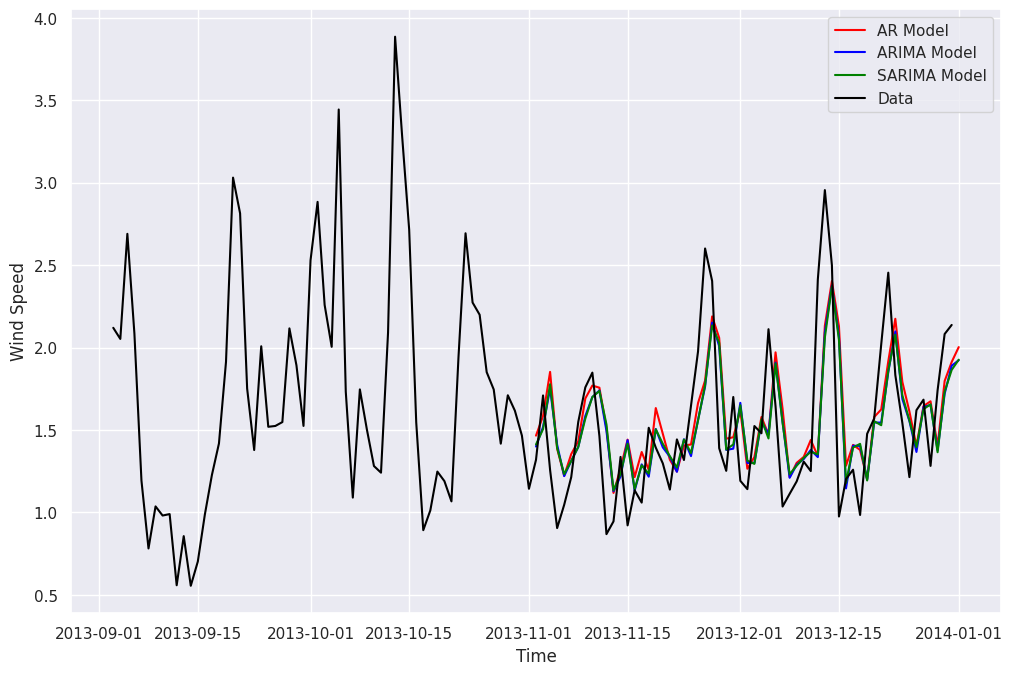

In [ ]:

# plt.plot(forecast,color='blue')
figure(figsize=(12, 8), dpi=100)
plt.plot(yhat_ar, color='red')
plt.plot(yhat_arima, color='blue')
plt.plot(yhat_sarima,color="green")
plt.plot(trainplt, color='black')
plt.xlabel("Time")
plt.ylabel("Wind Speed")

plt.legend(('AR Model','ARIMA Model','SARIMA Model',"Data"))

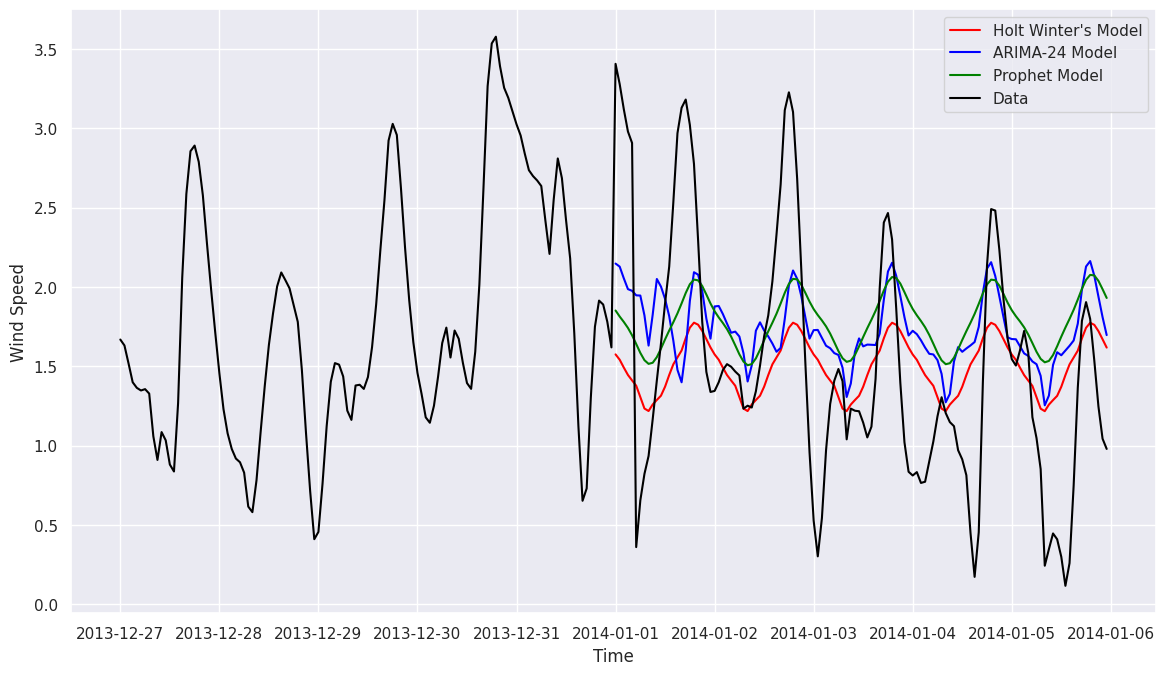

In [ ]:

# plt.plot(forecast,color='blue')
figure(figsize=(14, 8), dpi=100)
# fig, ax = plt.subplots(figsize=(12, 8))

# ax.set_xticks(yhat_data.index)
plt.plot(yhat_holt, color='red')
plt.plot(yhat_arima24, color='blue')
plt.plot(yhat_prophet,color="green")
plt.plot(yhat_data, color='black')
plt.xlabel("Time")
plt.ylabel("Wind Speed")

plt.legend(('Holt Winter\'s Model','ARIMA-24 Model','Prophet Model',"Data"))

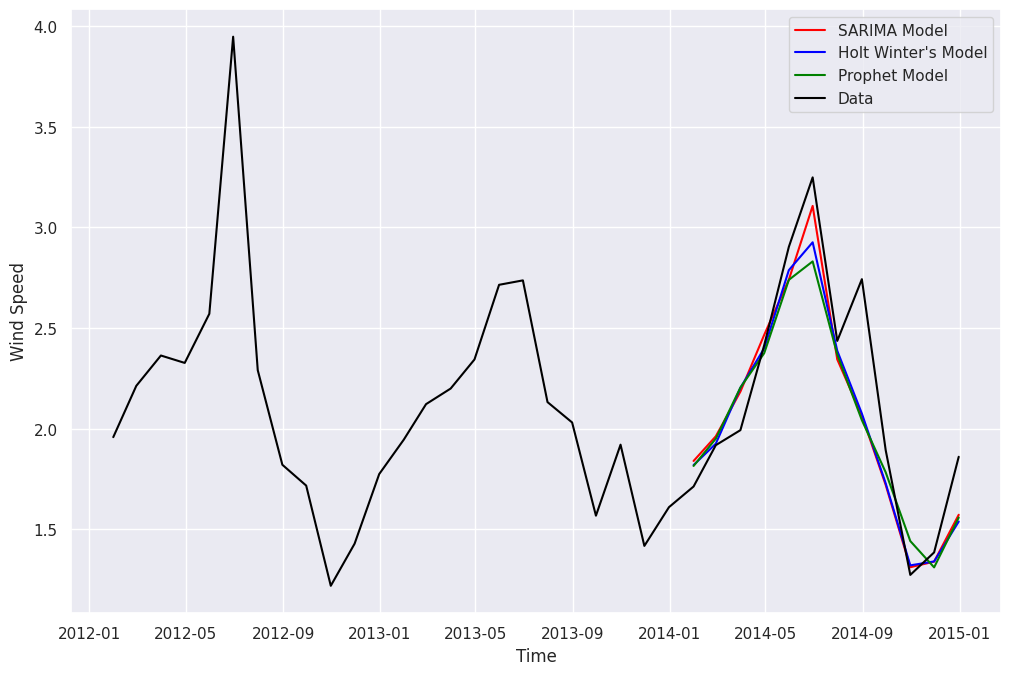

In [ ]:

# plt.plot(forecast,color='blue')
figure(figsize=(12, 8), dpi=100)
# fig, ax = plt.subplots(figsize=(12, 8))

# ax.set_xticks(yhat_data.index)
plt.plot(yhat_sarima, color='red')
plt.plot(yhat_holt, color='blue')
plt.plot(yhat_prophet,color="green")
plt.plot(yhat_data, color='black')
plt.xlabel("Time")
plt.ylabel("Wind Speed")

plt.legend(('SARIMA Model','Holt Winter\'s Model','Prophet Model',"Data"))

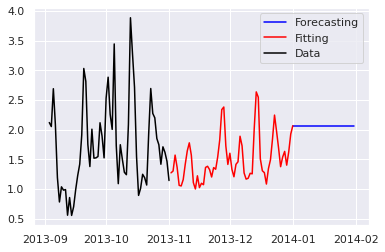

In [ ]:
#SIMPLE EXPONENTIAL SMOOTHENING
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# fit model
model = SimpleExpSmoothing(train)
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(train), len(train)+30)
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)
# plt.plot(test['Wind Speed'])
# plt.plot(yhat.loc[:,0], color='red')
trainplt=train[len(train)-30*4:len(train)-30*2]
yhat = model_fit.predict(len(train)-30*2, len(train))
forecast=model_fit.predict(len(train), len(train)+30)

plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data',))

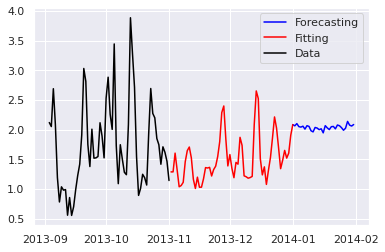

In [ ]:
#Holt Winters Exponential Smoothening
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=30)
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(train), len(train)+30)
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)
# plt.plot(test['Wind Speed'])
# plt.plot(yhat.loc[:,0], color='red')
trainplt=train[len(train)-30*4:len(train)-30*2]
yhat = model_fit.predict(len(train)-30*2, len(train))
forecast=model_fit.predict(len(train), len(train)+30)


plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data',))

In [ ]:
def rmse(yhat,test):
  se = np.square(yhat[0] - test['Wind Speed'].values)
  mse = np.mean(se)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
#Daily Forecast
#MA Model
from statsmodels.tsa.arima.model import ARIMA
# contrived dataset
# fit model
model = ARIMA(train, order=(0, 0, 2))
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(train), len(train)+30)
# yhat=yhat.reset_index()
# print(rmse(yhat,test))
trainplt=train[len(train)-30*4:len(train)-30*2]
yhat = model_fit.predict(len(train)-30*2, len(train))
forecast=model_fit.predict(len(train), len(train)+30)




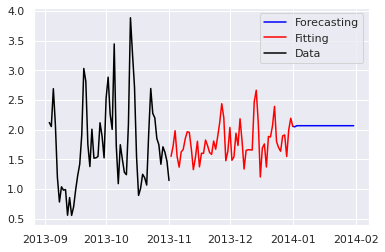

In [ ]:
# plt.plot(test['Wind Speed'])
# plt.plot(yhat['predicted_mean'], color='red')

plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data',))

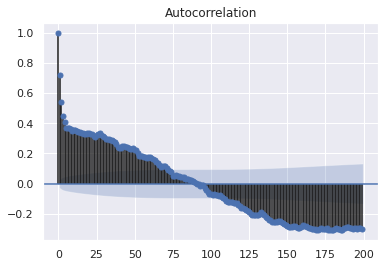

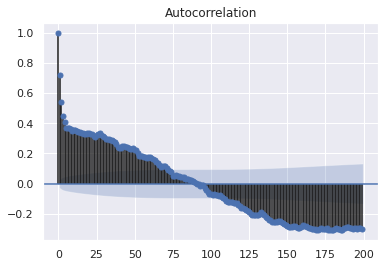

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# series = data['Wind Speed']
plot_acf(data,lags=np.arange(200))

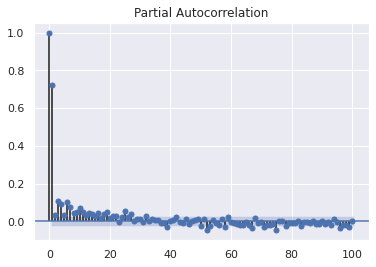

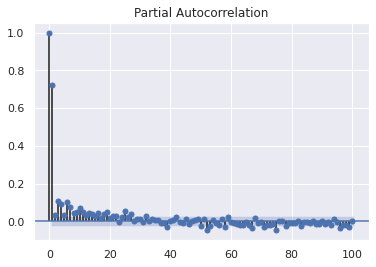

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=100)

In [ ]:
#Daily Forecast
#ARMA Model
from statsmodels.tsa.arima.model import ARIMA
# contrived dataset
# fit model
model = ARIMA(train, order=(4, 0, 3))
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(train), len(train)+30)
# yhat=yhat.reset_index()
# print(rmse(yhat,test))
trainplt=train[len(train)-30*4:len(train)-30*2]
yhat = model_fit.predict(len(train)-30*2, len(train))
forecast=model_fit.predict(len(train), len(train)+30)



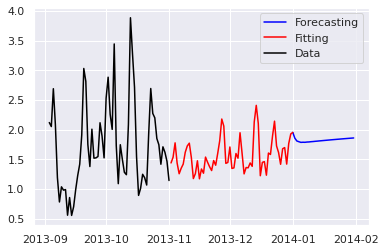

In [ ]:
# plt.plot(test['Wind Speed'])
# plt.plot(yhat['predicted_mean'], color='red')

plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data',))

In [ ]:
#Daily Forecast
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
# contrived dataset
# fit model
model = ARIMA(train, order=(4, 2, 3))
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(0, len(train))
# yhat=yhat.reset_index()
# print(rmse(yhat,test))
trainplt=train[len(train)-30*4:]
yhat_arima = model_fit.predict(len(train)-30*2, len(train))
forecast=model_fit.predict(len(train), len(train)+30)


In [ ]:
yhat=yhat[0:-1]

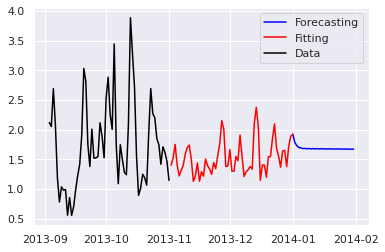

In [ ]:
# plt.plot(train,marker='.',linestyle='None')
# plt.plot(yhat, color='red')

plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data',))

In [ ]:
##decrease data in train
st = datetime.datetime(2005, 12, 31, 0, 0)

train=train[st:]

2005-12-31    1.919778
2006-01-01    1.931324
2006-01-02    2.144841
2006-01-03    2.318262
2006-01-04    2.043145
Freq: D, Name: Wind Speed, dtype: float64

In [ ]:
## (2,0,1) , (1,0,1,30)   .496539
## (2,0,2), (1,0,1,30) 0.432856
## (3,0,2), (1,0,1,30) 0.43673044
## (2,0,3), (1,0,1,30) 0.432589
## (2,1,3), (1,0,1,30) 0.43223915
## (2,1,3), (2,0,1,30) 0.4320783
##(2,1,3), (2,0,2,30) 0.431970207
##(2,1,3), (2,0,3,30) 0.44705301080


from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(4,2,3),seasonal_order=(1,0,1,30))
model_fit = model.fit()
trainplt=train[len(train)-30*4:]
yhat_sarima = model_fit.predict(len(train)-30*2, len(train))
# forecast=model_fit.predict(len(train), len(train)+30)
# yhat = model_fit.predict(len(train), len(train)+30)
# e=rmse(yhat,test)
# print(e)


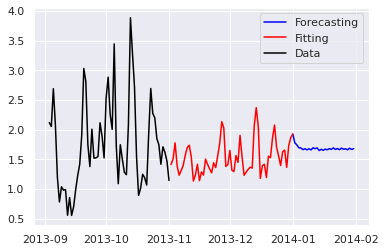

In [ ]:
# plt.plot(test['Wind Speed'])
# plt.plot(yhat['predicted_mean'], color='red')

plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data'))

In [ ]:
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')

data=data['Wind Speed'].resample('M').mean()
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2013, 12, 31)
endi=datetime.datetime(2014, 1, 1)
endl=datetime.datetime(2015, 1, 1)
index = pd.date_range(start, end)
train=data[start:end]
test=data[endi:endl]
test=test.reset_index()

In [ ]:
start=datetime.datetime(2012,1,1)
yhat_data=data[start:endl]

In [ ]:
print(yhat_data)

2012-01-31    1.958570
2012-02-29    2.213388
2012-03-31    2.364006
2012-04-30    2.327231
2012-05-31    2.571181
2012-06-30    3.947434
2012-07-31    2.291031
2012-08-31    1.821351
2012-09-30    1.717964
2012-10-31    1.220254
2012-11-30    1.429460
2012-12-31    1.775247
2013-01-31    1.946385
2013-02-28    2.122468
2013-03-31    2.199986
2013-04-30    2.344321
2013-05-31    2.715172
2013-06-30    2.737143
2013-07-31    2.132637
2013-08-31    2.031434
2013-09-30    1.568571
2013-10-31    1.921149
2013-11-30    1.418430
2013-12-31    1.610695
2014-01-31    1.713384
2014-02-28    1.918669
2014-03-31    1.993314
2014-04-30    2.415834
2014-05-31    2.903670
2014-06-30    3.248754
2014-07-31    2.436500
2014-08-31    2.743164
2014-09-30    1.893754
2014-10-31    1.274353
2014-11-30    1.386110
2014-12-31    1.861041
Freq: M, Name: Wind Speed, dtype: float64


In [ ]:
def rmse(yhat,test):
  se = np.square(yhat.loc[:, 0].values - test['Wind Speed'].values)
  mse = np.mean(se)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
#best at 49
from statsmodels.tsa.ar_model import AutoReg
best_lag=1
e_min=1.0
for lag in range(1,50):
  model = AutoReg(train, lags=lag)
  model_fit = model.fit()
  yhat = model_fit.predict(len(train), len(train)+11)
  yhat=yhat.reset_index()
  e=rmse(yhat,test)
  if(e<e_min):
    e_min=e
    best_lag=lag
    print(e_min)
    print(best_lag)



0.6043769462850652
1
0.5767511739605956
2
0.5188980997412468
3
0.46703248899517413
4
0.4294352869991386
5
0.42005637937576296
6
0.3815568499958111
7
0.3744600737015381
8
0.36984254959526963
9
0.3692921102522237
10
0.3620407094624682
12
0.3612805108252437
13
0.3608510401746947
15
0.3597020822196034
16
0.3476030870157587
21
0.33250729865916073
22
0.3213188331284238
23
0.28821002634039883
24


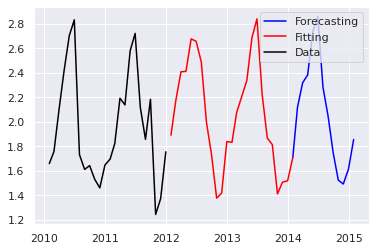

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train, lags=24)
model_fit = model.fit()
# yhat = model_fit.predict(len(train), len(train)+11)
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)
trainplt=train[len(train)-12*4:len(train)-12*2]
yhat = model_fit.predict(len(train)-12*2, len(train))
forecast=model_fit.predict(len(train), len(train)+12)
# plt.plot(test['Wind Speed'])
# plt.plot(yhat.loc[:,0], color='red')
plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data'))

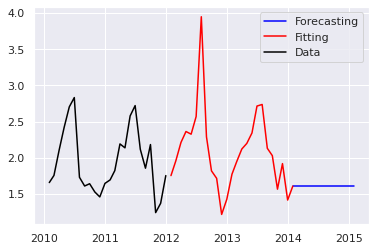

In [ ]:
#SIMPLE EXPONENTIAL SMOOTHENING
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# fit model
model = SimpleExpSmoothing(train)
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(train), len(train)+11)
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)
trainplt=train[len(train)-12*4:len(train)-12*2]
yhat = model_fit.predict(len(train)-12*2, len(train))
forecast=model_fit.predict(len(train), len(train)+12)
# plt.plot(test['Wind Speed'])
# plt.plot(yhat.loc[:,0], color='red')
plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data'))

In [ ]:
#Holt Winters Exponential Smoothening
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=24)
model_fit = model.fit()
trainplt=train[len(train)-12*4:len(train)-12*2]
yhat = model_fit.predict(len(train)-12*2, len(train))
yhat_holt=model_fit.predict(len(train), len(train)+11)
# make prediction
# yhat = model_fit.predict(0, len(train))
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)
# plt.plot(test['Wind Speed'])
# plt.plot(yhat.loc[:,0], color='red')


In [ ]:
print(yhat_holt)

2014-01-31    1.819863
2014-02-28    1.926010
2014-03-31    2.203880
2014-04-30    2.399860
2014-05-31    2.787950
2014-06-30    2.926398
2014-07-31    2.387581
2014-08-31    2.075545
2014-09-30    1.729122
2014-10-31    1.321717
2014-11-30    1.341184
2014-12-31    1.539327
Freq: M, dtype: float64


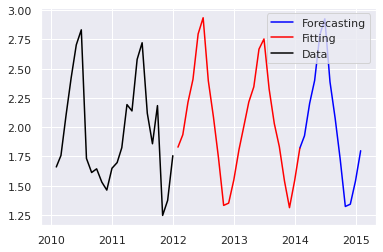

In [ ]:
# plt.plot(train,marker='.',linestyle='None')
# plt.plot(yhat, color='red')
plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data'))

In [ ]:
def rmse(yhat,test):
  se = np.square(yhat['predicted_mean'].values - test['Wind Speed'].values)
  mse = np.mean(se)
  rmse = np.sqrt(mse)
  return rmse

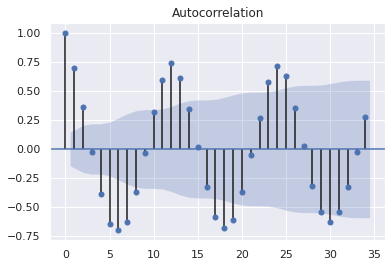

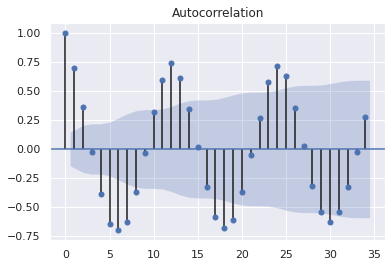

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
# series = data['Wind Speed']
plot_acf(data,lags=np.arange(35))

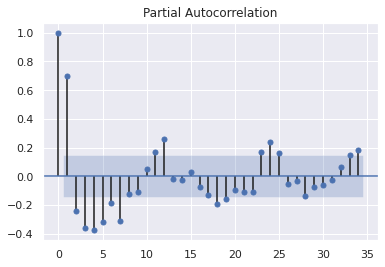

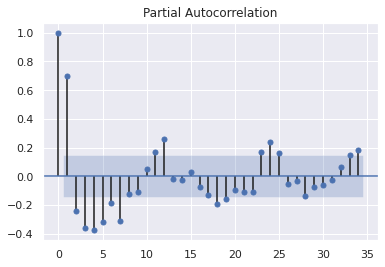

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
# series = data['Wind Speed']
plot_pacf(data,lags=np.arange(35))

In [ ]:
#Daily Forecast
#MA Model
from statsmodels.tsa.arima.model import ARIMA
# contrived dataset
# fit model
model = ARIMA(train, order=(0, 0, 8))
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(train), len(train)+11)
# yhat=yhat.reset_index()
# print(rmse(yhat,test))
trainplt=train[len(train)-12*4:len(train)-12*2]
yhat = model_fit.predict(len(train)-12*2, len(train))
forecast=model_fit.predict(len(train), len(train)+12)


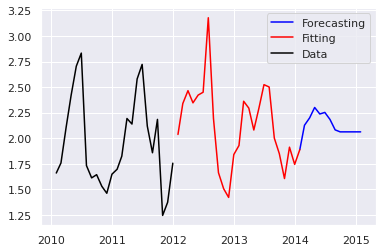

In [ ]:
# plt.plot(test['Wind Speed'])
# plt.plot(yhat['predicted_mean'], color='red')
plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data'))

In [ ]:
#MONTHLY Forecast
#ARMA Model
from statsmodels.tsa.arima.model import ARIMA
# contrived dataset
# fit model
model = ARIMA(train, order=(2, 0, 8))
model_fit = model.fit()
# make prediction
# yhat = model_fit.predict(len(train), len(train)+11)
# yhat=yhat.reset_index()
# print(rmse(yhat,test))
trainplt=train[len(train)-12*4:len(train)-12*2]
yhat = model_fit.predict(len(train)-12*2, len(train))
forecast=model_fit.predict(len(train), len(train)+12)


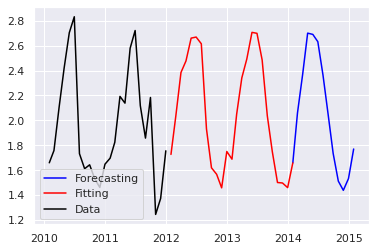

In [ ]:
# plt.plot(test['Wind Speed'])
# plt.plot(yhat['predicted_mean'], color='red')
plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data'))

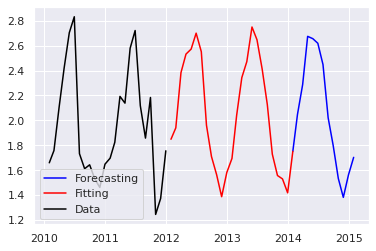

In [ ]:
#Daily Forecast
#ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
# contrived dataset
# fit model
model = ARIMA(train, order=(4,1,8))
model_fit = model.fit()
trainplt=train[len(train)-12*4:len(train)-12*2]
yhat = model_fit.predict(len(train)-12*2, len(train))
forecast=model_fit.predict(len(train), len(train)+12)
# make prediction
# yhat = model_fit.predict(len(train), len(train)+11)
# yhat=yhat.reset_index()
# print(rmse(yhat,test))
# plt.plot(test['Wind Speed'])
# plt.plot(yhat['predicted_mean'], color='red')
plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data'))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(2,1,8),seasonal_order=(2,1,2,24))
model_fit = model.fit()
yhat = model_fit.predict(0, len(train))
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)

In [ ]:
# plt.plot(train,marker='.',linestyle='None')
# plt.plot(yhat, color='red')
trainplt=train[len(train)-12*4:len(train)-12*2]
yhat = model_fit.predict(len(train)-12*2, len(train))
yhat_sarima=model_fit.predict(len(train), len(train)+11)
plt.plot(forecast,color='blue')
plt.plot(yhat, color='red')
plt.plot(trainplt, color='black')
plt.legend(('Forecasting','Fitting','Data'))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa6798174d0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [ ]:
print(yhat_sarima)

2014-01-31    1.840247
2014-02-28    1.962789
2014-03-31    2.184878
2014-04-30    2.467002
2014-05-31    2.740324
2014-06-30    3.107042
2014-07-31    2.344588
2014-08-31    2.065323
2014-09-30    1.721045
2014-10-31    1.312535
2014-11-30    1.340195
2014-12-31    1.573060
Freq: M, Name: predicted_mean, dtype: float64


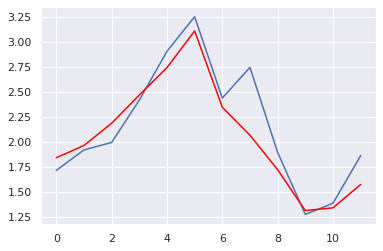

In [ ]:
plt.plot(test['Wind Speed'])
plt.plot(yhat['predicted_mean'], color='red')

In [ ]:
#SARIMAX MOdel Longer predictions
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')

data=data['Wind Speed'].resample('M').mean()
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2011, 12, 31)
endi=datetime.datetime(2012, 1, 1)
endl=datetime.datetime(2015, 1, 1)
index = pd.date_range(start, end)
train=data[start:end]
test=data[endi:]
test=test.reset_index()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data, order=(2,1,8),seasonal_order=(2,1,2,24))
model_fit = model.fit()
# yhat = model_fit.predict(len(train), len(train)+35)
# yhat=yhat.reset_index()
# e=rmse(yhat,test)
# print(e)

In [ ]:
yhat=model_fit.predict(len(train),len(train)+35)

In [ ]:
future=model_fit.predict(len(train)+35,len(train)+35+36)

2000-01-31    1.998494
2000-02-29    2.220146
2000-03-31    2.549402
2000-04-30    2.489526
2000-05-31    3.086157
Freq: M, Name: Wind Speed, dtype: float64

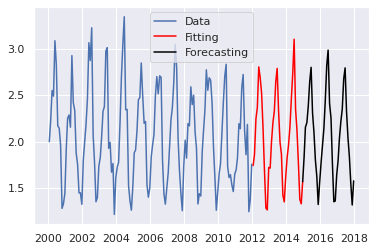

In [ ]:
plt.plot(train)
plt.plot(yhat,color='red')
plt.plot(future,color='black')
plt.legend(('Data','Fitting','Forecasting'))

In [ ]:

#SARIMAX MOdel Longer predictions DAILY
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')
#Daily Forecast

data=data['Wind Speed'].resample('D').mean()
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2014, 10, 31)
endi=datetime.datetime(2014, 11, 1)
endl=datetime.datetime(2015, 1, 1)
index = pd.date_range(start, end)
train=data[start:end]
test=data[endi:endl]
test=test.reset_index()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(4,2,3),seasonal_order=(1,0,1,30))
model_fit = model.fit()
yhat = model_fit.predict(len(train), len(train)+60)
yhat=yhat.reset_index()
e=rmse(yhat,test)
print(e)

0.5685073723975945


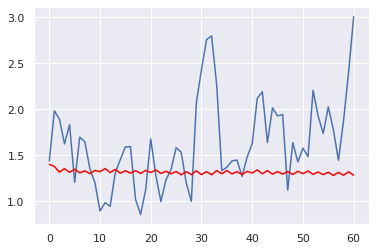

In [ ]:
plt.plot(test['Wind Speed'])
plt.plot(yhat['predicted_mean'], color='red')

In [ ]:
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')
data['Wind Speed']=data['Wind Speed'].resample('H').mean()

data_sets=[]
for i in range(24):
  data_sets.append(data.loc[data['Hour']==i])
  data_sets[i]=data_sets[i]['Wind Speed']





In [ ]:
start = datetime.datetime(2000, 1, 1,0,0)
end = datetime.datetime(2013, 12, 31,23,59)
endi=datetime.datetime(2014, 1, 1,0,0)
endl=datetime.datetime(2014, 1, 5,23,23)
index = pd.date_range(start, end)
train_sets=[]
test_sets=[]
for i in range(24):
  train_sets.append(data_sets[i][start:end])
  test_sets.append(data_sets[i][endi:endl])

In [ ]:
print(test_sets[4][9])

1.330632925


In [ ]:
def rmse(yhat,test):
  se = np.square(yhat - test)
  mse = np.mean(se)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
#AR 
from statsmodels.tsa.ar_model import AutoReg
model_set=[]
model_fit_set=[]
yhat_set=[]
for i in range(24):
  model_set.append(AutoReg(train_sets[i], lags=10))
  model_fit_set.append(model_set[i].fit())
  yhat_set.append(model_fit_set[i].predict(len(train_sets[i]), len(train_sets[i])+4))
yhat=[]
test=[]
for i in range(5110,5111+4):
  for j in range(24):
    yhat.append(yhat_set[j][i])
    test.append(test_sets[j][i-5110])
yhat=np.array(yhat)
test=np.array(test)



In [ ]:
print(len(test))

120


In [ ]:
yhat_ar24=pd.Series(yhat,index=yhat_prophet.index)

In [ ]:
print(yhat_ar24)

ds
2014-01-01 00:00:00    2.306777
2014-01-01 01:00:00    2.265641
2014-01-01 02:00:00    2.203862
2014-01-01 03:00:00    2.156735
2014-01-01 04:00:00    2.150232
                         ...   
2014-01-05 19:00:00    2.379130
2014-01-05 20:00:00    2.282989
2014-01-05 21:00:00    2.133718
2014-01-05 22:00:00    1.987496
2014-01-05 23:00:00    1.853351
Length: 120, dtype: float64


In [ ]:
print(yhat_ar24)

ds
2014-01-01 00:00:00    2.306777
2014-01-01 01:00:00    2.265641
2014-01-01 02:00:00    2.203862
2014-01-01 03:00:00    2.156735
2014-01-01 04:00:00    2.150232
2014-01-01 05:00:00    2.167816
2014-01-01 06:00:00    2.170042
2014-01-01 07:00:00    1.988187
2014-01-01 08:00:00    1.803764
2014-01-01 09:00:00    2.042825
2014-01-01 10:00:00    2.234745
2014-01-01 11:00:00    2.191448
2014-01-01 12:00:00    2.089678
2014-01-01 13:00:00    1.994984
2014-01-01 14:00:00    1.816027
2014-01-01 15:00:00    1.615971
2014-01-01 16:00:00    1.522861
2014-01-01 17:00:00    1.716284
2014-01-01 18:00:00    2.026050
2014-01-01 19:00:00    2.211930
2014-01-01 20:00:00    2.196574
2014-01-01 21:00:00    2.077651
2014-01-01 22:00:00    1.943628
2014-01-01 23:00:00    1.804283
dtype: float64


In [ ]:
print(test)

0.8364356768524879


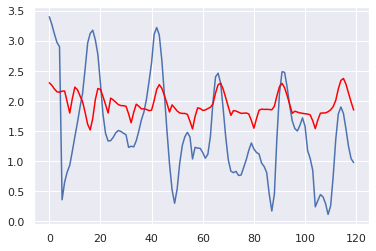

In [ ]:
# plt.plot(train)
plt.plot(test)
plt.plot(yhat, color='red')
print(rmse(yhat,test))

In [ ]:
#(2,0,1)  0.72846213
# (3,0,1) 0.7305236056698424
# (4,0,1) 0.7312947300188714
#(2,1,1) 0.7023836774197878
#(3,1,1) 0.7032096076496401
#(4,1,1)
#(2,2,1) 0.93384
#(3,2,1) 0.8486829606966135
#(4,2,1) 0.8063132541120529
# (5,2,1)  0.777109818671391
# (6,2,1)
#(2,0,2) 0.7306680067788004
# (3,0,2)  0.7302927114487668
# (4,0,2) 
#(2,1,2) 0.7019652240143609
#(3,1,2) 0.7024484504461093
#(4,1,2)
#(2,2,2)
#(3,2,2)
#(4,2,2)
#(2,0,3)  
#(3,0,3) 
#(4,0,3) 
#(2,1,3)
#(3,1,3)
#(4,1,3) 0.7081175139907748
#(2,2,3)
#(3,2,3)
#(4,2,3)

from statsmodels.tsa.arima.model import ARIMA
model_set=[]
model_fit_set=[]
yhat_set=[]
for i in range(24):
  model_set.append(ARIMA(train_sets[i], order=(2,1,2)))
  model_fit_set.append(model_set[i].fit())
  yhat_set.append(model_fit_set[i].predict(len(train_sets[i]), len(train_sets[i])+4))
yhat=[]
test=[]
for i in range(5110,5111+4):
  for j in range(24):
    yhat.append(yhat_set[j][i])
    test.append(test_sets[j][i-5110])
yhat=np.array(yhat)
test=np.array(test)

In [ ]:
yhat_arima24=pd.Series(yhat,index=yhat_prophet.index)

In [ ]:
print(yhat_arima24)

ds
2014-01-01 00:00:00    2.147278
2014-01-01 01:00:00    2.127812
2014-01-01 02:00:00    2.053986
2014-01-01 03:00:00    1.986163
2014-01-01 04:00:00    1.975568
                         ...   
2014-01-05 19:00:00    2.162788
2014-01-05 20:00:00    2.070982
2014-01-05 21:00:00    1.939327
2014-01-05 22:00:00    1.810284
2014-01-05 23:00:00    1.696697
Length: 120, dtype: float64


0.7412055324099043


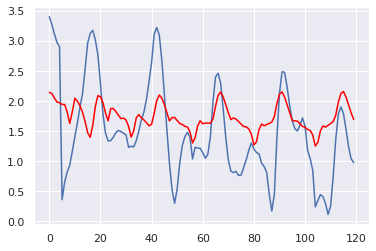

In [ ]:
plt.plot(test)
plt.plot(yhat, color='red')
print(rmse(yhat,test))

In [ ]:
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')
data=data['Wind Speed'].resample('H').mean()

In [ ]:
start = datetime.datetime(2000, 1, 1,0,0)
end=datetime.datetime(2014, 1, 1,23,0)
data=data[start:end]
series=np.array(data.values)
series=series.reshape(-1,1)

In [ ]:
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1):
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values

In [ ]:
def model_fit(train, config):
	return None

In [ ]:
def model_predict(model, history, config):
	return 0.0

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from numpy import mean
from numpy import std
from numpy import median
from matplotlib import pyplot
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [ ]:
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  # split dataset
  train, test = train_test_split(data, n_test)
  # print(len(train))
  # print((len(test)))
  # fit model
  model = model_fit(train, cfg)
  # seed history with training dataset
  history = [x for x in train]
  # step over each time-step in the test set
  for i in range(len(test)):
    # fit model and make forecast for history
    yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
    predictions.append(yhat)
		# add actual observation to history for the next loop
    history.append(predictions[-1])  ### change to test[i]
  error = measure_rmse(test, predictions)
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  print(' > %.3f' % error)
  # print(predictions)
  return error


In [ ]:
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores

In [ ]:
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()

In [ ]:
config = [1,2,3,12,24]  ##previous values used to predict

In [ ]:
def model_predict(model, history, config):
	values = list()
	for offset in config:
		values.append(history[-offset])
	return median(values)

 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
 > 0.993
persistence: 0.993 RMSE (+/- 0.000)


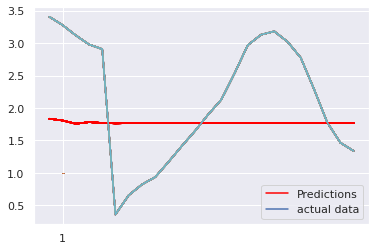

In [ ]:
#simple persistence model
scores = repeat_evaluate(series, config, n_test=24)
summarize_scores('persistence', scores)

 > 0.963


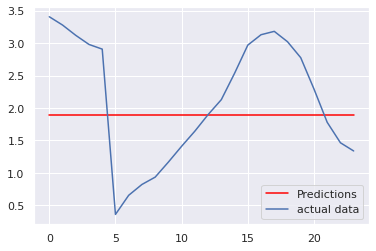

In [ ]:
e=walk_forward_validation(series,24, config)

In [ ]:
#mlp hourly
#(24,500,100,100) -0.690
# same - 0.683
#only predictions
#1.529
#1.366







from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_nodes, n_epochs, n_batch = config
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	# define model
	model = Sequential()
	model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _ = config
	# prepare data
	x_input = array(history[-n_input:]).reshape(1, n_input)
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(predictions[-1])  #change to test[i]
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
# data split
n_test = 24
# define config
config = [24, 500, 100, 100]    #n_input, n_nodes,n_epochs,n_batchsize
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('mlp', scores)

 > 0.683


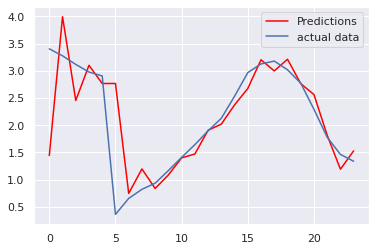

In [ ]:
scores = repeat_evaluate(series, config, n_test,1) #.append(test[i])

 > 1.118


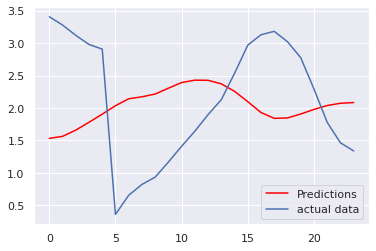

In [ ]:
scores = repeat_evaluate(series, config, n_test,1) #.append(predictions[-1])

In [ ]:
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')
data=data['Wind Speed'].resample('H').mean()

start = datetime.datetime(2008, 1, 1,0,0)
end=datetime.datetime(2014, 1, 1,23,0)
data=data[start:end]
series=np.array(data.values)
series=series.reshape(-1,1)

 > 0.725
cnn: 0.725 RMSE (+/- 0.000)


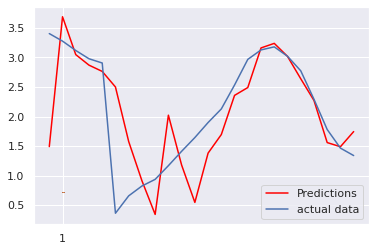

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_filters, n_kernel, n_epochs, n_batch = config
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# define model
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(n_input, 1)))
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, _ = config
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
 
# data split
n_test = 24
# define config
config = [36, 256, 3, 100, 100]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('cnn', scores)

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

KeyboardInterrupt: ignored

 > 0.726
lstm: 0.726 RMSE (+/- 0.000)


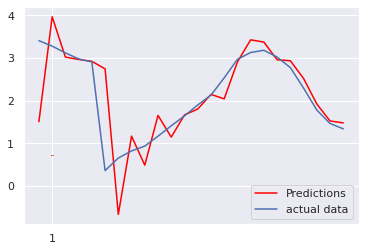

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_nodes, n_epochs, n_batch, n_diff = config
	# prepare data
	if n_diff > 0:
		train = difference(train, n_diff)
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, 1)))
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, n_diff = config
	# prepare data
	correction = 0.0
	if n_diff > 0:
		correction = history[-n_diff]
		history = difference(history, n_diff)
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return correction + yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
# data split
n_test = 24
# define config
config = [48, 50, 100, 100, 24]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('lstm', scores)

 > 0.692
cnn-lstm: 0.692 RMSE (+/- 0.000)


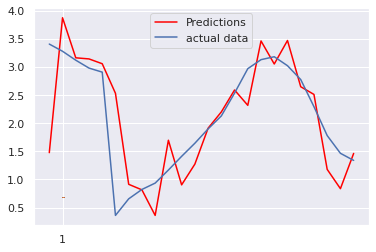

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_seq, n_steps, n_filters, n_kernel, n_nodes, n_epochs, n_batch = config
	n_input = n_seq * n_steps
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], n_seq, n_steps, 1))
	# define model
	model = Sequential()
	model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(None,n_steps,1))))
	model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu')))
	model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
	model.add(TimeDistributed(Flatten()))
	model.add(LSTM(n_nodes, activation='relu'))
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_seq, n_steps, _, _, _, _, _ = config
	n_input = n_seq * n_steps
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_seq, n_steps, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
 
# data split
n_test = 24
# define config
config = [2, 24, 64, 3, 100, 200, 100]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('cnn-lstm', scores)

 > 0.830
convlstm: 0.830 RMSE (+/- 0.000)


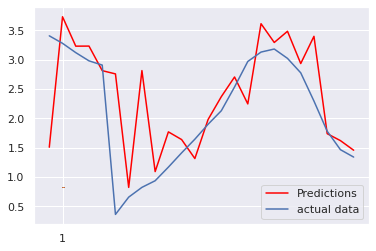

In [ ]:
# evaluate convlstm
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_seq, n_steps, n_filters, n_kernel, n_nodes, n_epochs, n_batch = config
	n_input = n_seq * n_steps
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], n_seq, 1, n_steps, 1))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=n_filters, kernel_size=(1,n_kernel), activation='relu', input_shape=(n_seq, 1, n_steps, 1)))
	model.add(Flatten())
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_seq, n_steps, _, _, _, _, _ = config
	n_input = n_seq * n_steps
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_seq, 1, n_steps, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
# data split
n_test = 24
# define config
config = [2, 24, 64, 3, 200, 200, 100]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('convlstm', scores)

In [ ]:
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')
data=data['Wind Speed'].resample('D').mean()

start = datetime.datetime(2000, 1, 1,0,0)
end=datetime.datetime(2014, 1, 1,23,0)
data=data[start:end]
series=np.array(data.values)
series=series.reshape(-1,1)

In [ ]:
from math import sqrt
from numpy import mean
from numpy import std
from numpy import median
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# fit a model
def model_fit(train, config):
	return None
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	values = list()
	for offset in config:
		values.append(history[-offset])
	return median(values)
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
 
# data split
n_test = 31
# define config
config = [1,2,3,4,5,10,15,30]
# grid search
# scores = repeat_evaluate(series, config, n_test)
# # summarize scores
# summarize_scores('persistence', scores)

 > 0.516
mlp: 0.516 RMSE (+/- 0.000)


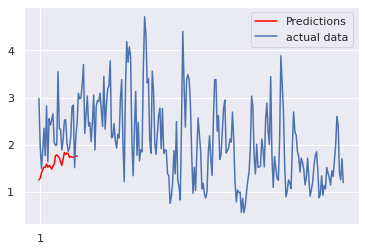

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_nodes, n_epochs, n_batch = config
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	# define model
	model = Sequential()
	model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _ = config
	# prepare data
	x_input = array(history[-n_input:]).reshape(1, n_input)
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(predictions[-1])  #change to test[i]
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
# data split
n_test = 31
# define config
config = [30, 500, 100, 100]    #n_input, n_nodes,n_epochs,n_batchsize
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('mlp', scores)

 > 0.532


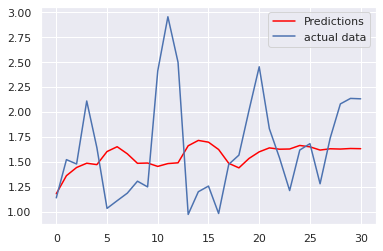

In [ ]:
scores = repeat_evaluate(series, config, n_test,1) #.append(test[i])

 > 0.528


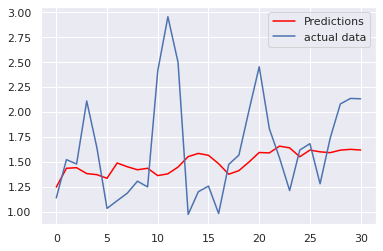

In [ ]:
scores = repeat_evaluate(series, config, n_test,1) #.append(test[i])

 > 0.522


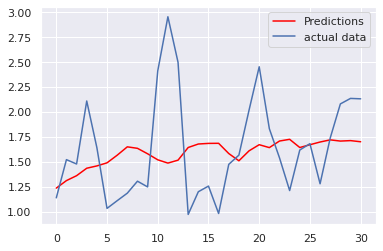

In [ ]:
scores = repeat_evaluate(series, config, n_test,1) #.append(test[i])

In [ ]:
config=[15,500,100,100]

 > 0.492


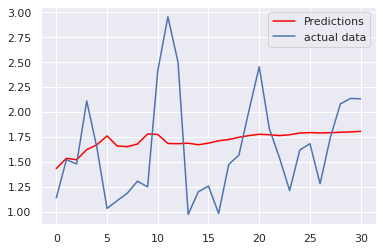

In [ ]:
scores = repeat_evaluate(series, config, n_test,1) #.append(test[i])

 > 0.645


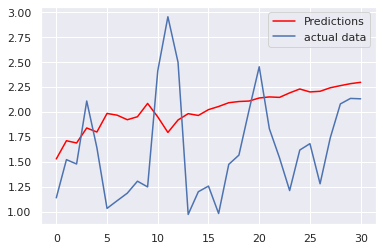

In [ ]:
config=[15,500,500,500]
scores = repeat_evaluate(series, config, n_test,1) #.append(test[i])

 > 0.529


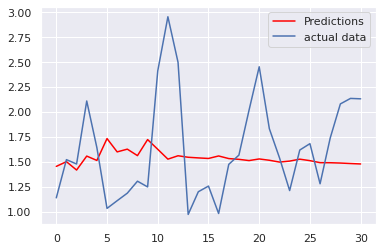

In [ ]:
config=[15,500,500,500]
scores = repeat_evaluate(series, config, n_test,1) #.append(test[i])

 > 0.482


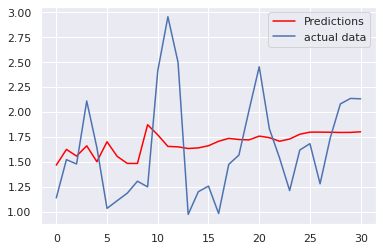

In [ ]:
config=[15,500,500,500]
scores = repeat_evaluate(series, config, n_test,1) #.append(test[i])

 > 0.499
cnn: 0.499 RMSE (+/- 0.000)


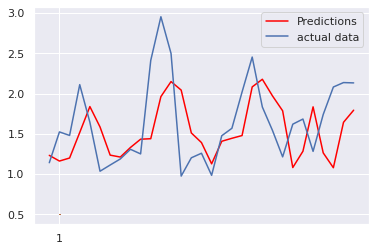

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_filters, n_kernel, n_epochs, n_batch = config
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# define model
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(n_input, 1)))
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, _ = config
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
 
# data split
n_test = 31
# define config
config = [30, 256, 3, 100, 100]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('cnn', scores)

 > 0.460


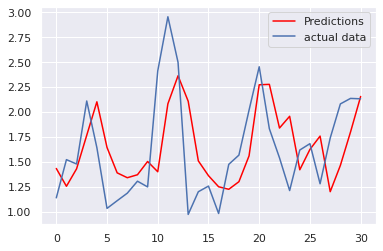

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.484


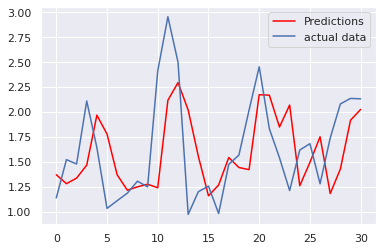

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.508


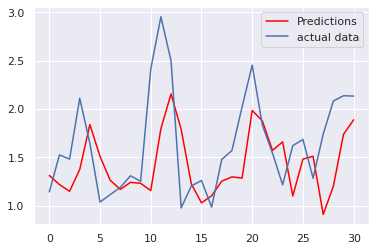

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.489


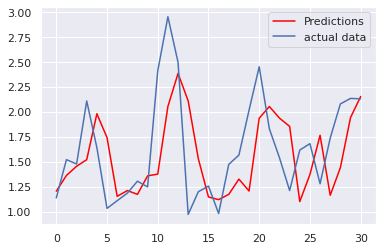

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.503


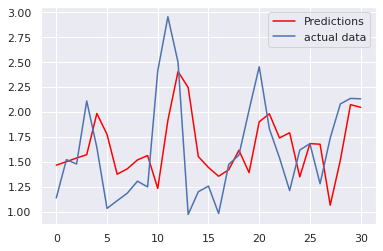

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.599
lstm: 0.599 RMSE (+/- 0.000)


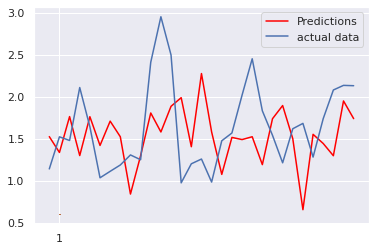

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_nodes, n_epochs, n_batch, n_diff = config
	# prepare data
	if n_diff > 0:
		train = difference(train, n_diff)
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, 1)))
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, n_diff = config
	# prepare data
	correction = 0.0
	if n_diff > 0:
		correction = history[-n_diff]
		history = difference(history, n_diff)
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return correction + yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
# data split
n_test = 31
# define config
config = [30, 50, 100, 100, 30]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('lstm', scores)

 > 0.605


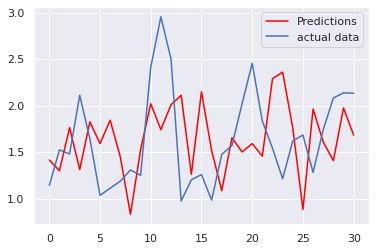

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.613


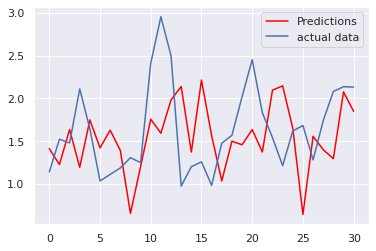

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.617


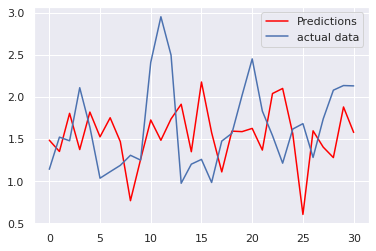

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.586


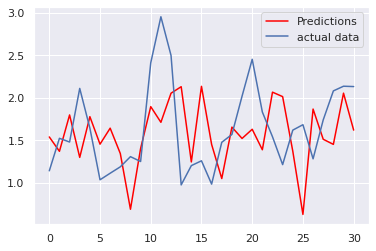

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.612


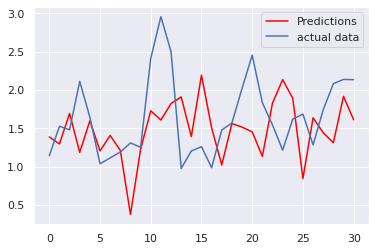

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.572
cnn-lstm: 0.572 RMSE (+/- 0.000)


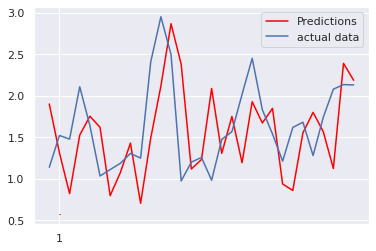

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_seq, n_steps, n_filters, n_kernel, n_nodes, n_epochs, n_batch = config
	n_input = n_seq * n_steps
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], n_seq, n_steps, 1))
	# define model
	model = Sequential()
	model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(None,n_steps,1))))
	model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu')))
	model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
	model.add(TimeDistributed(Flatten()))
	model.add(LSTM(n_nodes, activation='relu'))
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_seq, n_steps, _, _, _, _, _ = config
	n_input = n_seq * n_steps
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_seq, n_steps, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
 
# data split
n_test = 31
# define config
config = [3, 30, 64, 3, 100, 200, 100]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('cnn-lstm', scores)

 > 0.643


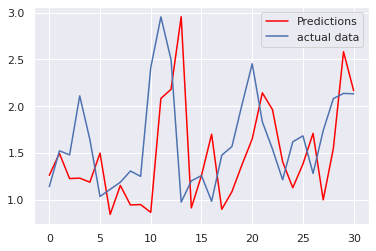

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.483


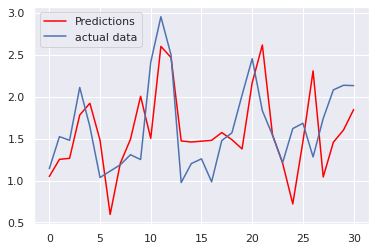

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.491


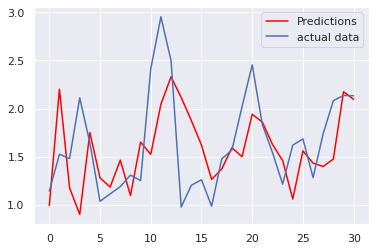

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.480


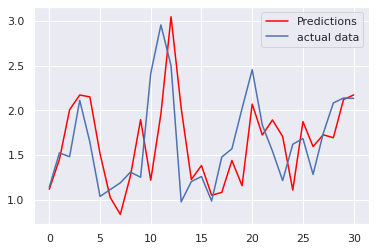

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.518
convlstm: 0.518 RMSE (+/- 0.000)


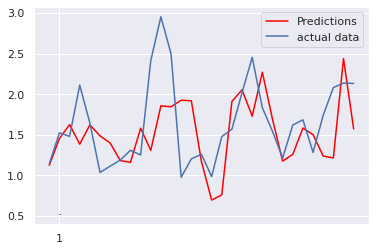

In [ ]:
# evaluate convlstm
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_seq, n_steps, n_filters, n_kernel, n_nodes, n_epochs, n_batch = config
	n_input = n_seq * n_steps
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], n_seq, 1, n_steps, 1))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=n_filters, kernel_size=(1,n_kernel), activation='relu', input_shape=(n_seq, 1, n_steps, 1)))
	model.add(Flatten())
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_seq, n_steps, _, _, _, _, _ = config
	n_input = n_seq * n_steps
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_seq, 1, n_steps, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
# data split
n_test = 31
# define config
config = [3, 12, 256, 3, 200, 200, 100]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('convlstm', scores)

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

KeyboardInterrupt: ignored

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

In [ ]:
data = pd.read_csv("wind_dataset.csv")
data['Date'] =  pd.to_datetime(data['Date'],format='%H:%d/%m/%Y')
data = data.set_index('Date')
#Adding NaN at missing timestamps to make data uniform.
data=data.reindex(pd.date_range(start=data.index[0], end=data.index[-1], freq='1H'))
#interpolate and fill NaN values
data['Wind Speed']=data['Wind Speed'].interpolate(method='linear')
data=data['Wind Speed'].resample('M').mean()

start = datetime.datetime(2000, 1, 1,0,0)
end=datetime.datetime(2014, 1, 1,23,0)
data=data[start:end]
series=np.array(data.values)
series=series.reshape(-1,1)

 > 0.248
persistence: 0.248 RMSE (+/- 0.000)


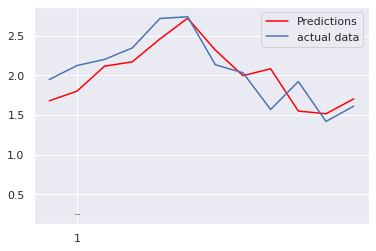

In [ ]:
from math import sqrt
from numpy import mean
from numpy import std
from numpy import median
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# fit a model
def model_fit(train, config):
	return None
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	values = list()
	for offset in config:
		values.append(history[-offset])
	return median(values)
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
 
# data split
n_test = 12
# define config
config = [1,2,3,12,24,36]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('persistence', scores)

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.248


 > 0.174
mlp: 0.174 RMSE (+/- 0.000)


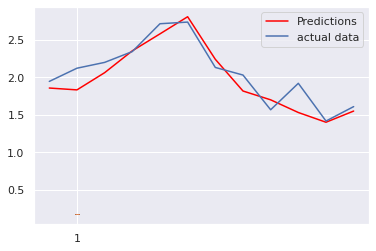

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_nodes, n_epochs, n_batch = config
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	# define model
	model = Sequential()
	model.add(Dense(n_nodes, activation='relu', input_dim=n_input))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _ = config
	# prepare data
	x_input = array(history[-n_input:]).reshape(1, n_input)
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(predictions[-1])  #change to test[i]
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
# data split
n_test = 12
# define config
config = [36, 500, 100, 100]    #n_input, n_nodes,n_epochs,n_batchsize
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('mlp', scores)

 > 0.182


[0.18216330792613541]

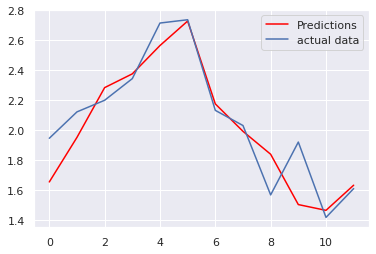

In [ ]:
repeat_evaluate(series, config, n_test,1)

 > 0.157


[0.15652177831157688]

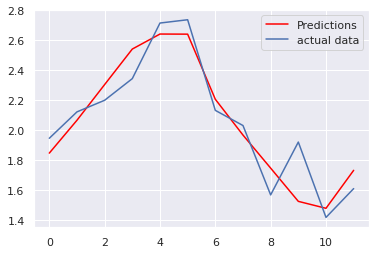

In [ ]:
repeat_evaluate(series, config, n_test,1)

 > 0.229


[0.22930684896925968]

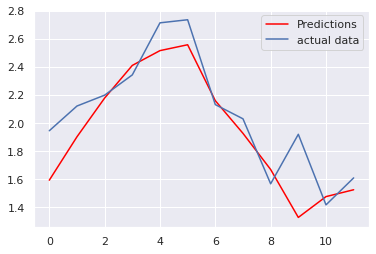

In [ ]:
repeat_evaluate(series, config, n_test,1)

 > 0.260


[0.2600436549893041]

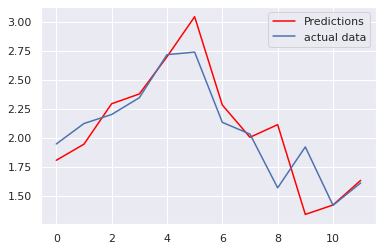

In [ ]:
config = [24, 500, 300, 300]
repeat_evaluate(series, config, n_test,1)

 > 0.214


[0.21392208484817998]

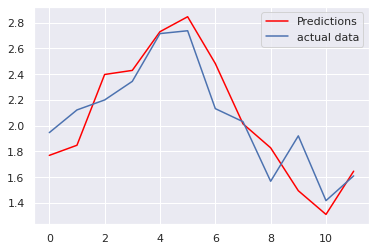

In [ ]:
config = [24, 500, 300, 300]
repeat_evaluate(series, config, n_test,1)

 > 0.202


[0.20249513895426915]

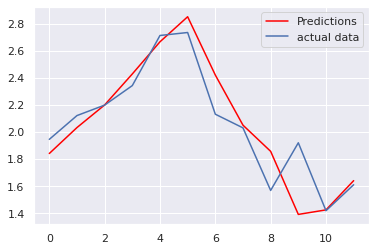

In [ ]:
config = [24, 500, 300, 300]
repeat_evaluate(series, config, n_test,1)

 > 0.200


[0.19968776232772517]

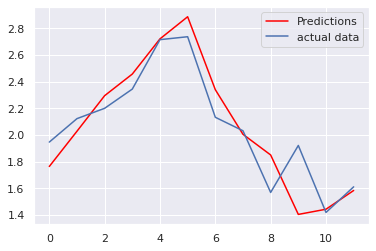

In [ ]:
config = [24, 500, 300, 300]
repeat_evaluate(series, config, n_test,1)

 > 0.217


[0.21719471903624668]

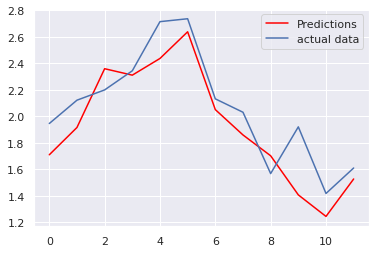

In [ ]:
config = [36, 500, 200, 200]
repeat_evaluate(series, config, n_test,1)

 > 0.226


[0.22632483309327422]

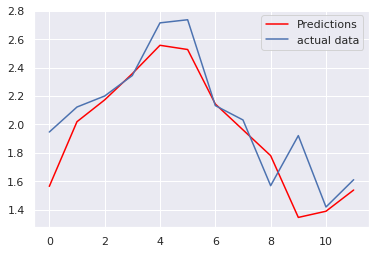

In [ ]:
config = [36, 500, 200, 200]
repeat_evaluate(series, config, n_test,1)

 > 0.169


[0.16937442623785684]

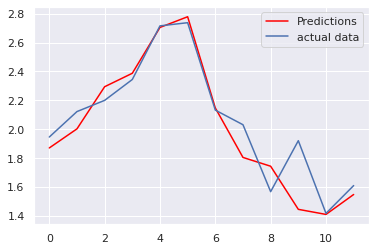

In [ ]:
config = [36, 500, 200, 200]
repeat_evaluate(series, config, n_test,1)

 > 0.190


[0.1895896223226597]

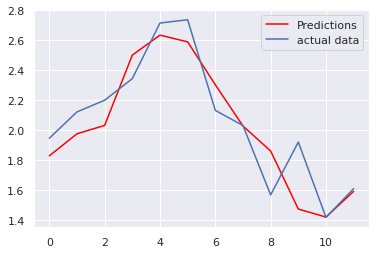

In [ ]:
config = [36, 500, 200, 200]
repeat_evaluate(series, config, n_test,1)

 > 0.190


[0.19004653431402305]

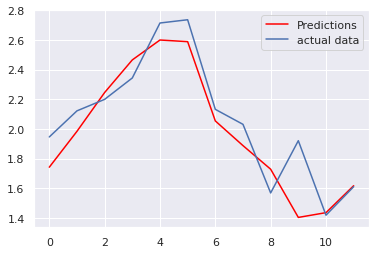

In [ ]:
config = [36, 500, 100, 100]
repeat_evaluate(series, config, n_test,1)

 > 0.164


[0.16367571591247587]

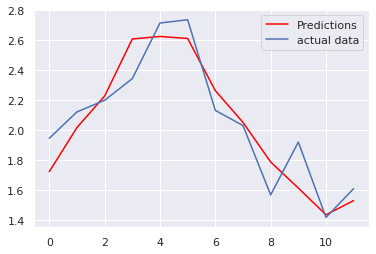

In [ ]:
config = [36, 500, 100, 100]
repeat_evaluate(series, config, n_test,1)

 > 0.185


[0.1845542015429446]

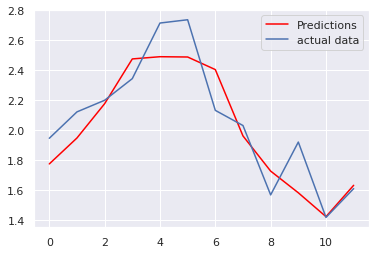

In [ ]:
config = [36, 500, 150, 150]
repeat_evaluate(series, config, n_test,1)

 > 0.173
cnn: 0.173 RMSE (+/- 0.000)


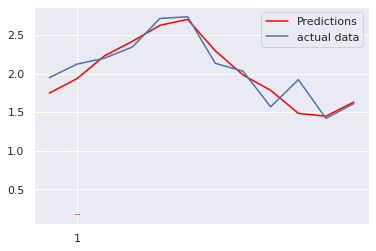

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_filters, n_kernel, n_epochs, n_batch = config
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# define model
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(n_input, 1)))
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, _ = config
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
 
# data split
n_test = 12
# define config
config = [36, 256, 3, 100, 100]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('cnn', scores)

 > 0.176


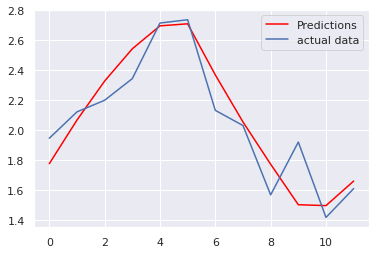

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.186


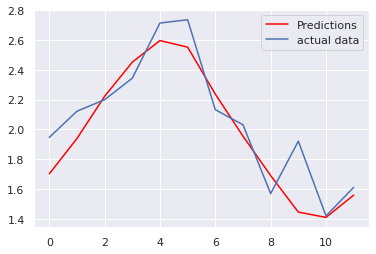

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.160


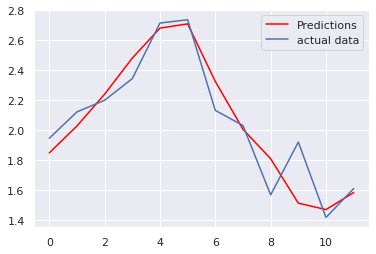

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.174


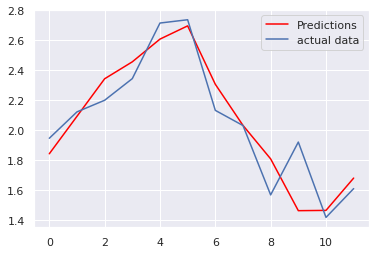

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.188


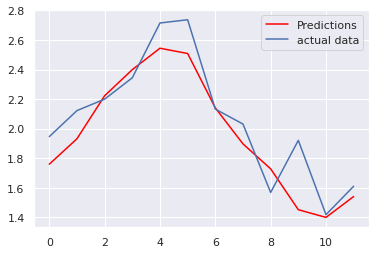

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.427
lstm: 0.427 RMSE (+/- 0.000)


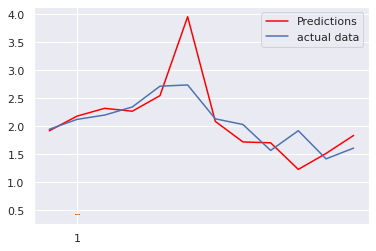

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_input, n_nodes, n_epochs, n_batch, n_diff = config
	# prepare data
	if n_diff > 0:
		train = difference(train, n_diff)
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, 1)))
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, n_diff = config
	# prepare data
	correction = 0.0
	if n_diff > 0:
		correction = history[-n_diff]
		history = difference(history, n_diff)
	x_input = array(history[-n_input:]).reshape((1, n_input, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return correction + yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
# data split
n_test = 12
# define config
config = [36, 50, 100, 100, 12]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('lstm', scores)

 > 0.442


[0.4421826436465612]

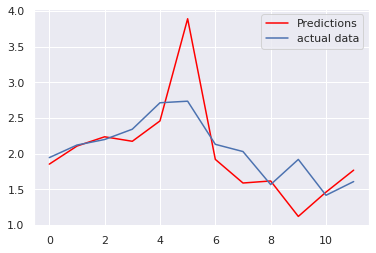

In [ ]:
repeat_evaluate(series, config, n_test,1)

 > 0.431


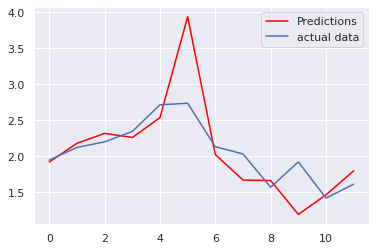

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.427


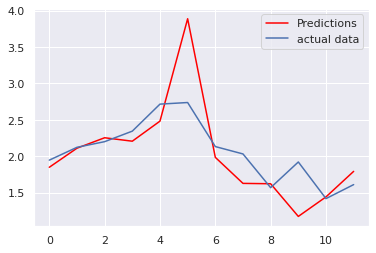

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.439


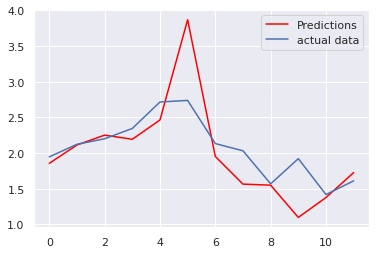

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.430


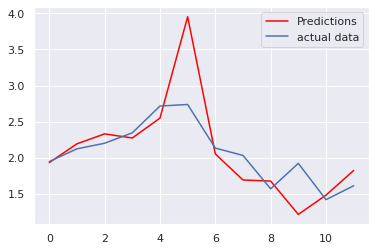

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.449


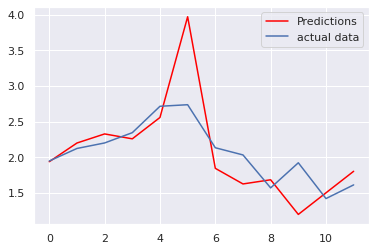

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.174
cnn-lstm: 0.174 RMSE (+/- 0.000)


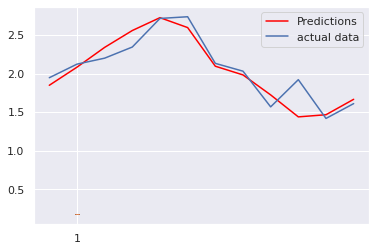

In [ ]:
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_seq, n_steps, n_filters, n_kernel, n_nodes, n_epochs, n_batch = config
	n_input = n_seq * n_steps
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], n_seq, n_steps, 1))
	# define model
	model = Sequential()
	model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu', input_shape=(None,n_steps,1))))
	model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel, activation='relu')))
	model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
	model.add(TimeDistributed(Flatten()))
	model.add(LSTM(n_nodes, activation='relu'))
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_seq, n_steps, _, _, _, _, _ = config
	n_input = n_seq * n_steps
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_seq, n_steps, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
 
# data split
n_test = 12
# define config
config = [3, 12, 64, 3, 100, 200, 100]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('cnn-lstm', scores)

 > 0.192


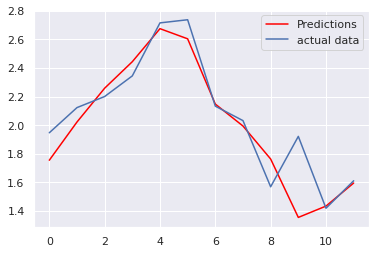

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.184


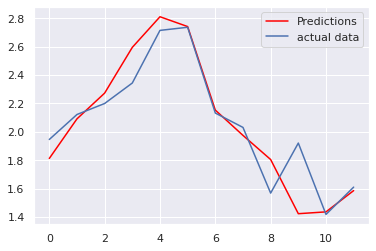

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.212


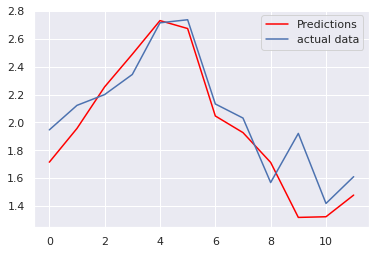

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.182


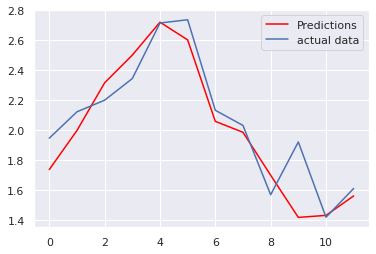

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.187


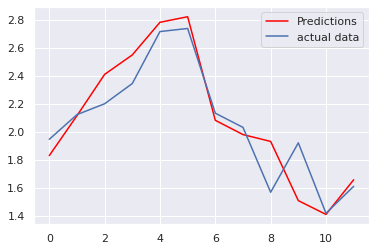

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.186


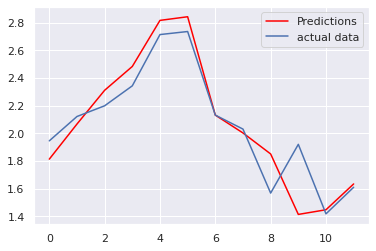

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.189


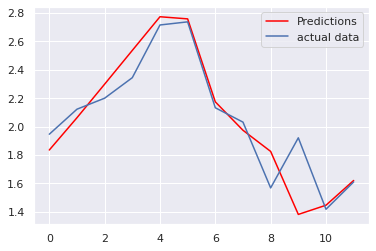

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.231
convlstm: 0.231 RMSE (+/- 0.000)


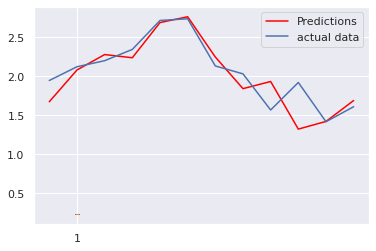

In [ ]:
# evaluate convlstm
from math import sqrt
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
from matplotlib import pyplot
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# difference dataset
def difference(data, interval):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
 
# fit a model
def model_fit(train, config):
	# unpack config
	n_seq, n_steps, n_filters, n_kernel, n_nodes, n_epochs, n_batch = config
	n_input = n_seq * n_steps
	# prepare data
	data = series_to_supervised(train, n_in=n_input)
	train_x, train_y = data[:, :-1], data[:, -1]
	train_x = train_x.reshape((train_x.shape[0], n_seq, 1, n_steps, 1))
	# define model
	model = Sequential()
	model.add(ConvLSTM2D(filters=n_filters, kernel_size=(1,n_kernel), activation='relu', input_shape=(n_seq, 1, n_steps, 1)))
	model.add(Flatten())
	model.add(Dense(n_nodes, activation='relu'))
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	# fit
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return model
 
# forecast with a pre-fit model
def model_predict(model, history, config):
	# unpack config
	n_seq, n_steps, _, _, _, _, _ = config
	n_input = n_seq * n_steps
	# prepare data
	x_input = array(history[-n_input:]).reshape((1, n_seq, 1, n_steps, 1))
	# forecast
	yhat = model.predict(x_input, verbose=0)
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
  predictions = list()
  train, test = train_test_split(data, n_test)
  model = model_fit(train, cfg)
  history = [x for x in train]
  for i in range(len(test)):
    yhat = model_predict(model, history, cfg)
    predictions.append(yhat)
    history.append(test[i])
  plt.plot(predictions,color='red')
  plt.plot(test)
  plt.legend(('Predictions','actual data'))
  error = measure_rmse(test, predictions)
  print(' > %.3f' % error)
  return error
 
# repeat evaluation of a config
def repeat_evaluate(data, config, n_test, n_repeats=30):
	# fit and evaluate the model n times
	scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
	return scores
 
# summarize model performance
def summarize_scores(name, scores):
	# print a summary
	scores_m, score_std = mean(scores), std(scores)
	print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
	# box and whisker plot
	pyplot.boxplot(scores)
	pyplot.show()
# data split
n_test = 12
# define config
config = [3, 12, 256, 3, 200, 200, 100]
# grid search
scores = repeat_evaluate(series, config, n_test,1)
# summarize scores
summarize_scores('convlstm', scores)

 > 0.223


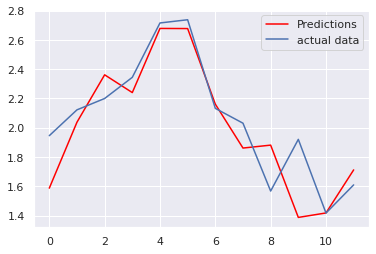

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.194


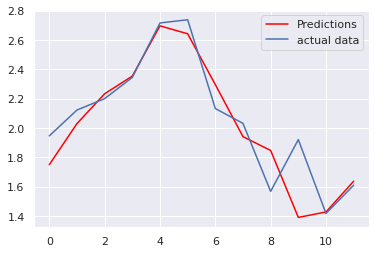

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.217


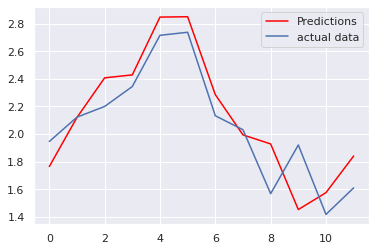

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.234


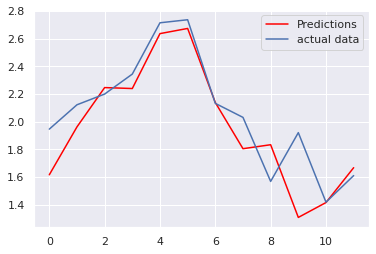

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)

 > 0.207


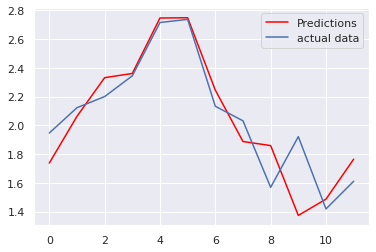

In [ ]:
scores = repeat_evaluate(series, config, n_test,1)